In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import datetime

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1. Contacts:
a. Id: Идентификатор контакта.
b. Contact Owner Name: Имя лица, ответственного за управление
контактом.
c. Created Time: Дата внесения контакта в базу.
d. Modified Time: Дата последней модификации контакта.
2. Calls:
a. Id: Уникальный идентификатор для каждого звонка.
b. Call Start Time: Время начала звонка.
c. Call Owner Name: Имя лица, ответственного за звонок.
d. CONTACTID: Уникальный идентификатор контакта.
e. Call Type: Тип звонка.
f. Call Duration (in seconds): Длительность звонка в секундах.
g. Call Status: Окончательный статус звонка.
h. Dialled Number: Набранный номер телефона.
i. Outgoing Call Status: Статус исходящих вызовов.
j. Scheduled in CRM: Указывает, был ли звонок запланирован через
систему CRM.
k. Tag: Тэг вызова.
3. Spend:
a. Date: Дата, указывающая, когда были отслежены показы, клики и
расходы на рекламу.
b. Source: Канал, на котором было показано объявление
c. Campaign: Кампания, в рамках которой было показано объявление.
d. Impressions: Количество показов рекламы пользователям.
e. Spend: Количество денег, потраченных на рекламную кампанию или
группу объявлений за указанный период.
f. Clicks: Количество нажатий пользователей на рекламу.
g. AdGroup: Подмножество в кампании, содержащее одно или несколько
объявлений с одинаковыми целями или настройками.
h. Ad: Конкретная реклама, показываемая пользователям.
4. Deals:
a. Id: Уникальный идентификатор для каждой сделки.
b. Deal Owner Name: Имя лица, ответственного за сделку.
c. Created Time: Метка времени, когда была создана сделка.
d. Course duration: Длительность курса на который поступает студент
e. Months of study: Количество месяцев которые отучился студент
f. Closing Date: Дата закрытия сделки, если применимо.
g. Quality: Классификация качества сделки, указывающая на ее
потенциальный или целевой статус.
h. Stage: Текущая стадия сделки.
i. Lost Reason: Причина, по которой сделка была потеряна, если
применимо.
j. Page: Веб-страница или целевая страница, на которой был получен
лид.
k. Campaign: Название или код маркетинговой кампании, связанной со
сделкой.
l. SLA: Время действия соглашения об уровне обслуживания,
указывающее на время отклика.
m. Content: (=Ad): Конкретная реклама, показываемая пользователям.
n. Term (=AdGroup): Подмножество в кампании, содержащее одно или
несколько объявлений с одинаковыми целями или настройками.
o. Source: Источник лида.
p. Payment Type: Тип используемого или ожидаемого способа оплаты.
q. Product: Конкретный продукт или услуга, связанная со сделкой.
r. Education Type: Тип образования или обучения.
s. Initial Amount Paid: Первоначальный платеж клиента.
t. Offer Total Amount: Общая сумма предложения, представленного
клиенту.
u. Contact Name: Идентификатор контактного лица по сделке.
v. City: Город, относящийся к клиенту.
w. Level of Deutsch: Уровень владения немецким языком клиента, если
применимо.

In [5]:
calls = pd.read_excel('calls.xlsx', dtype = {'Id' : str, 'CONTACTID' : str})
contacts = pd.read_excel('contacts.xlsx', dtype = {'Id' : str})
deals = pd.read_excel('deals.xlsx', dtype = {'Id' : str, 'Contact Name' : str})
spend = pd.read_excel('spend.xlsx')

# Оброботка данных

## contacts

In [6]:
contacts_df = contacts

In [7]:
contacts_df.sample(5)

,Id,Contact Owner Name,Created Time,Modified Time
13981,5805028000043643452,Amy Green,12.04.2024 21:50,16.04.2024 19:07
13053,5805028000041084214,Quincy Vincent,02.04.2024 10:19,02.04.2024 12:20
6991,5805028000022960042,Nina Scott,24.12.2023 08:28,24.12.2023 10:29
4315,5805028000015906076,Charlie Davis,07.11.2023 21:43,07.11.2023 23:46
8554,5805028000027755941,Quincy Vincent,23.01.2024 09:15,23.01.2024 11:18


In [8]:
contacts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  18548 non-null  object
 1   Contact Owner Name  18548 non-null  object
 2   Created Time        18548 non-null  object
 3   Modified Time       18548 non-null  object
dtypes: object(4)
memory usage: 579.8+ KB


In [9]:
contacts_df.describe()

,Id,Contact Owner Name,Created Time,Modified Time
count,18548,18548,18548,18548
unique,18548,28,17921,16580
top,5805028000056907001,Charlie Davis,10.06.2024 09:00,13.06.2024 17:08
freq,1,2018,13,25


<span style="color:red; font-size:24px;">❌</span> Обратить внимание на Charlie Davis

### Преобразование данных

In [10]:
contacts_df["Contact Owner Name"] = contacts_df["Contact Owner Name"].astype(str)

In [11]:
contacts_df["Created Time"] = pd.to_datetime(contacts_df["Created Time"], format="%d.%m.%Y %H:%M", errors='raise')

In [12]:
contacts_df["Modified Time"] = pd.to_datetime(contacts_df["Modified Time"], format="%d.%m.%Y %H:%M", errors='raise')

### Удаляем дубликаты

In [13]:
contacts_df[contacts_df.duplicated(keep=False, subset = contacts_df.columns[1:])].shape

(71, 4)

In [14]:
contacts_df.drop_duplicates(subset = contacts_df.columns[1:], inplace=True)     #inplace=True – удаление дубликатов происходит внутри contacts_df, и изменения сохраняются сразу:
contacts_df[contacts_df.duplicated(keep=False, subset = contacts_df.columns[1:])].shape

(0, 4)

In [15]:
# В теблице есть одна запись , где Contact Owner Name = FALSE, удаляю ету строку
contacts_df = contacts_df[contacts_df["Contact Owner Name"]!= "FALSE"]


### Удаляем столбец Modified Time, он не нужен для анализа

In [16]:
contacts_df = contacts_df.drop(columns=["Modified Time"])

In [17]:
count_nun = contacts_df.isnull().sum()
count_nun

Id                    0
Contact Owner Name    0
Created Time          0
dtype: int64

### EDA

#### 1. Contact Owner Name

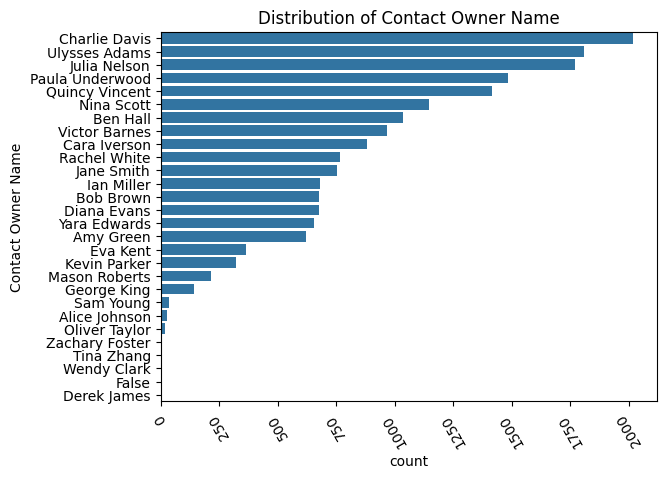

In [18]:
sns.countplot(
    data=contacts_df, 
    y="Contact Owner Name", 
    order=contacts_df["Contact Owner Name"].value_counts().index  # Sort by frequency
)
plt.title("Distribution of Contact Owner Name")  
plt.xticks(rotation=120) 
plt.show()



### Created Time

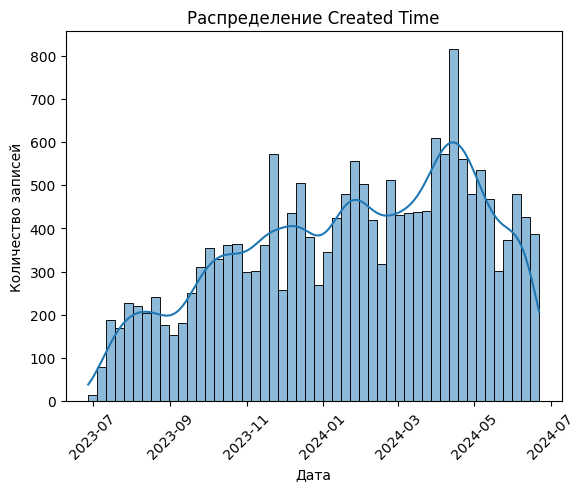

In [19]:
sns.histplot(contacts_df["Created Time"], bins=50, kde=True)
plt.title("Распределение Created Time")
plt.xlabel("Дата")
plt.ylabel("Количество записей")
plt.xticks(rotation=45)
plt.show()


In [20]:
contacts_df.describe()

,Created Time
count,18510
mean,2024-01-24 14:25:56.155591680
min,2023-06-27 11:28:00
25%,2023-11-15 16:49:15
50%,2024-02-01 18:44:30
75%,2024-04-12 16:15:45
max,2024-06-21 15:30:00


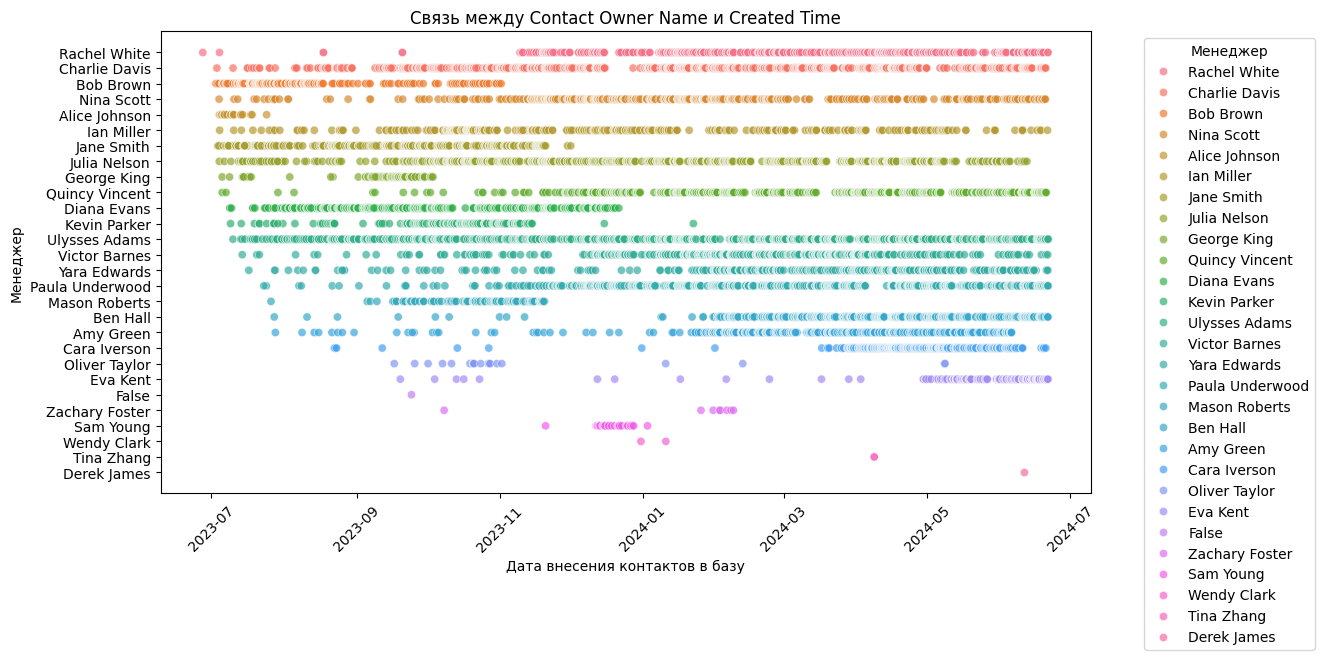

In [21]:

plt.figure(figsize=(12, 6))
sns.scatterplot(
    x=contacts_df["Created Time"], 
    y=contacts_df["Contact Owner Name"], 
    hue=contacts_df["Contact Owner Name"],  # Цвет по владельцу
    alpha=0.7  # Прозрачность точек
)

plt.xticks(rotation=45)
plt.title("Связь между Contact Owner Name и Created Time")
plt.xlabel("Дата внесения контактов в базу")
plt.ylabel("Менеджер")
plt.legend(title="Менеджер", bbox_to_anchor=(1.05, 1), loc='upper left')  # Размещение легенды

plt.show()


In [22]:
contacts_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18510 entries, 0 to 18547
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  18510 non-null  object        
 1   Contact Owner Name  18510 non-null  object        
 2   Created Time        18510 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 578.4+ KB


## calls

In [23]:
calls_df = calls

In [24]:
calls_df.sample(5)

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Dialled Number,Outgoing Call Status,Scheduled in CRM,Tag
66092,5805028000042651821,09.04.2024 17:38,Kevin Parker,5805028000022954508,Inbound,291.0,Received,NaN,NaN,NaN,NaN
14267,5805028000011646346,14.10.2023 13:01,Charlie Davis,5805028000011589267,Outbound,4.0,Attended Dialled,NaN,Completed,0.0,NaN
94780,5805028000056461025,19.06.2024 17:06,Ulysses Adams,5805028000056362225,Missed,0.0,Missed,NaN,NaN,NaN,NaN
60369,5805028000039893149,26.03.2024 16:22,Charlie Davis,5805028000038406013,Outbound,5.0,Attended Dialled,NaN,Completed,0.0,NaN
70189,5805028000044869841,18.04.2024 17:29,Derek James,5805028000026302509,Outbound,28.0,Attended Dialled,NaN,Completed,0.0,NaN


In [25]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          95874 non-null  object 
 1   Call Start Time             95874 non-null  object 
 2   Call Owner Name             95874 non-null  object 
 3   CONTACTID                   91941 non-null  object 
 4   Call Type                   95874 non-null  object 
 5   Call Duration (in seconds)  95791 non-null  float64
 6   Call Status                 95874 non-null  object 
 7   Dialled Number              0 non-null      float64
 8   Outgoing Call Status        86875 non-null  object 
 9   Scheduled in CRM            86875 non-null  float64
 10  Tag                         0 non-null      float64
dtypes: float64(4), object(7)
memory usage: 8.0+ MB


In [26]:
calls_df.describe()

,Call Duration (in seconds),Dialled Number,Scheduled in CRM,Tag
count,95791.000000,0.0,86875.000000,0.0
mean,164.977263,NaN,0.001635,NaN
std,401.410826,NaN,0.040397,NaN
min,0.000000,NaN,0.000000,NaN
25%,4.000000,NaN,0.000000,NaN
50%,8.000000,NaN,0.000000,NaN
75%,98.000000,NaN,0.000000,NaN
max,7625.000000,NaN,1.000000,NaN


### Преобразование данных 

In [27]:
calls_df["Call Start Time"] = pd.to_datetime(calls_df["Call Start Time"], format="%d.%m.%Y %H:%M", errors='raise')

In [28]:
calls_df["Call Owner Name"] = calls_df["Call Owner Name"].astype(str)

### Заполняем пустые значения в столбцах.
Call Duration (in seconds) заменяем нулями так как Call Status в отсутствующих значениях ровен Cancelled или Overdue. 
В столбце CONTACTID на Unknown



In [29]:
calls_df["Call Duration (in seconds)"] = calls_df["Call Duration (in seconds)"].fillna(0).astype(int)

In [30]:
calls_df["CONTACTID"] = calls_df["CONTACTID"].fillna("Unknown")

In [31]:
count_nun_calls = calls_df.isnull().sum()
count_nun_calls

Id                                0
Call Start Time                   0
Call Owner Name                   0
CONTACTID                         0
Call Type                         0
Call Duration (in seconds)        0
Call Status                       0
Dialled Number                95874
Outgoing Call Status           8999
Scheduled in CRM               8999
Tag                           95874
dtype: int64

❌ оброботать нулевые значения

### Создаю столбец Call Duration (in Minute ) и Call Duration (in Hour) для удобного анализа продолжительности звонка

In [32]:
calls_df["Call Duration (minutes)"] = (calls_df["Call Duration (in seconds)"] / 60).round(2)
calls_df["Call Duration (hours)"] = (calls_df["Call Duration (in seconds)"] / 3600).round(2)

### Находим полные дубликаты и удаляем их

In [31]:
calls_df[calls_df.duplicated(subset = calls_df.columns[1:])].shape

(0, 13)

In [ ]:
calls_df.drop_duplicates(subset = calls_df.columns[1:], inplace=True)     #inplace=True – удаление дубликатов происходит внутри contacts_df, и изменения сохраняются сразу:
calls_df[contacts_df.duplicated(keep=False, subset = calls_df.columns[1:])].shape

### Удаляем пустые столбцы  Tag и  Dialled Number 

In [34]:
calls_df = calls_df.drop(columns= ["Tag", "Dialled Number"])

### Одномерный анализ 

#### Call Start Time

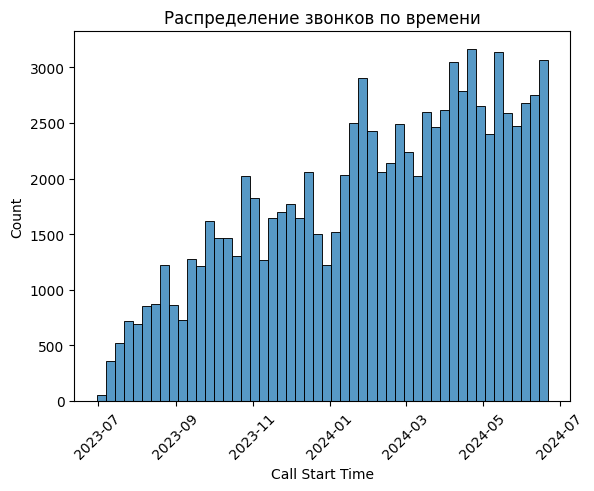

In [35]:
sns.histplot(calls_df["Call Start Time"], bins=50)
plt.xticks(rotation=45)
plt.title("Распределение звонков по времени")
plt.show()

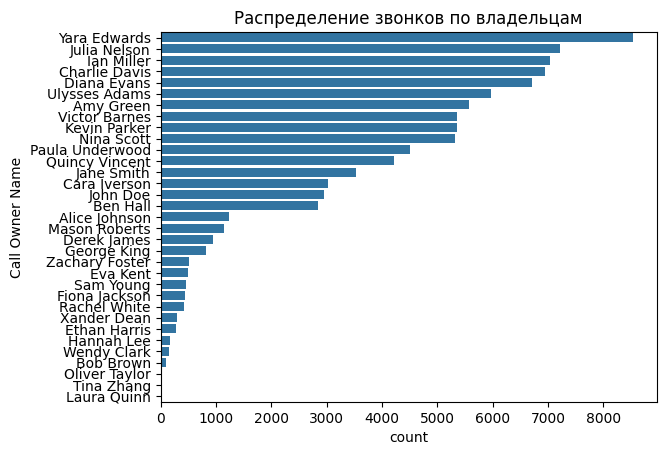

In [36]:
sns.countplot(y=calls_df["Call Owner Name"], order=calls_df["Call Owner Name"].value_counts().index)
plt.title("Распределение звонков по владельцам")
plt.show()

#### CONTACTID

In [37]:
print(calls_df["CONTACTID"].value_counts().head(10))

CONTACTID
Unknown                3802
5805028000003329100      94
5805028000007866898      70
5805028000008246089      70
5805028000001880249      66
5805028000002799040      57
5805028000001404153      55
5805028000022524164      54
5805028000003597256      53
5805028000008097198      53
Name: count, dtype: int64


In [38]:
count_contacts = calls_df[calls_df["CONTACTID"] != "Unknown"]["CONTACTID"].value_counts()


mean_contacts = count_contacts.mean()
min_contacts = count_contacts.min()
max_contacts = count_contacts.max()
median_contacts = count_contacts.median()


print(f"Среднее количество: {mean_contacts:.2f}")
print(f"Минимальное количество: {min_contacts}")
print(f"Максимальное количество: {max_contacts}")
print(f"Медианное количество записей на CONTACTID: {median_contacts}")

Среднее количество: 5.84
Минимальное количество: 1
Максимальное количество: 94
Медианное количество записей на CONTACTID: 4.0


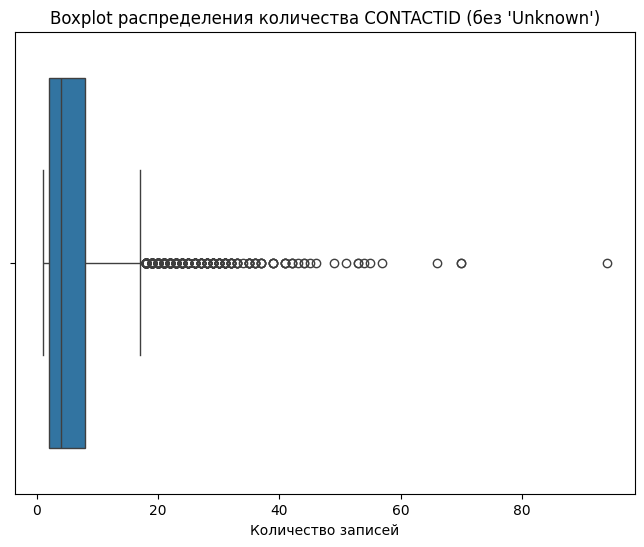

In [39]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=count_contacts)
plt.title("Boxplot распределения количества CONTACTID (без 'Unknown')")
plt.xlabel("Количество записей")
plt.show()

#### Call Type

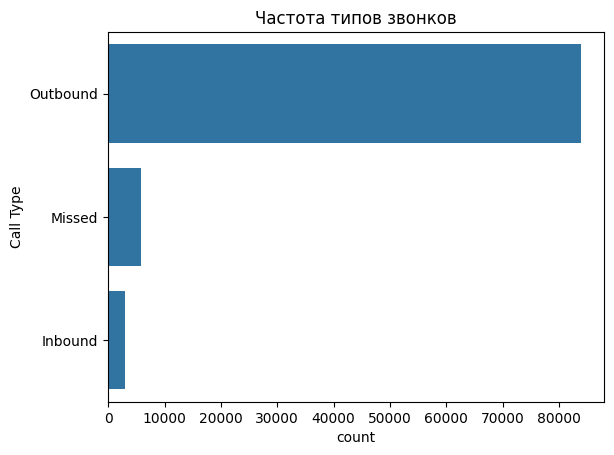

In [40]:
sns.countplot(y=calls_df["Call Type"], order=calls_df["Call Type"].value_counts().index)
plt.title("Частота типов звонков")
plt.show()


#### Call Duration (in seconds)

In [41]:
calls_df["Call Duration (in seconds)"].describe()

count    92617.000000
mean       170.184890
std        406.801264
min          0.000000
25%          4.000000
50%          9.000000
75%        107.000000
max       7625.000000
Name: Call Duration (in seconds), dtype: float64

In [42]:
# Фильтрация данных (исключаем 0)
filtered_calls = calls_df[calls_df["Call Duration (in seconds)"] > 0]

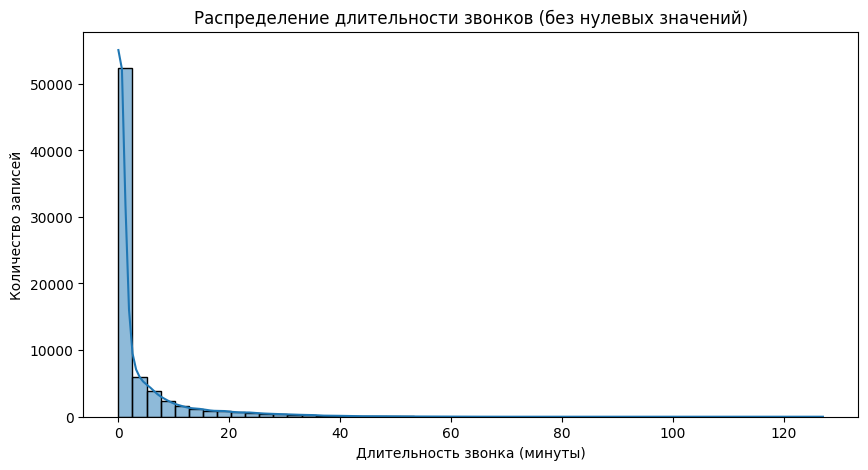

In [43]:
plt.figure(figsize=(10, 5))
sns.histplot(filtered_calls["Call Duration (minutes)"], bins=50, kde=True)
plt.title("Распределение длительности звонков (без нулевых значений)")
plt.xlabel("Длительность звонка (минуты)")
plt.ylabel("Количество записей")
plt.show()


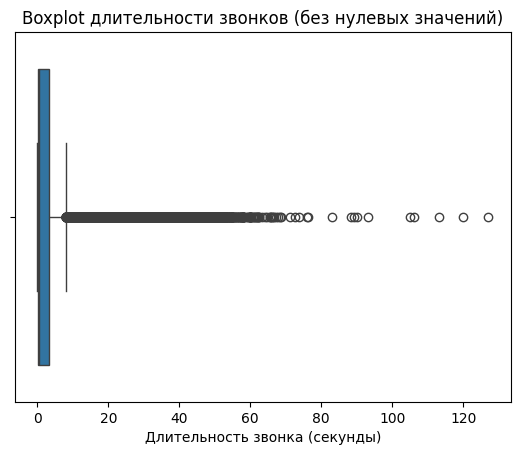

In [44]:
sns.boxplot(x=filtered_calls["Call Duration (minutes)"])
plt.title("Boxplot длительности звонков (без нулевых значений)")
plt.xlabel("Длительность звонка (секунды)")

plt.show()

### Call Status

unique_status_counts = calls_df["Call Status"].value_counts()
print(unique_status_counts)

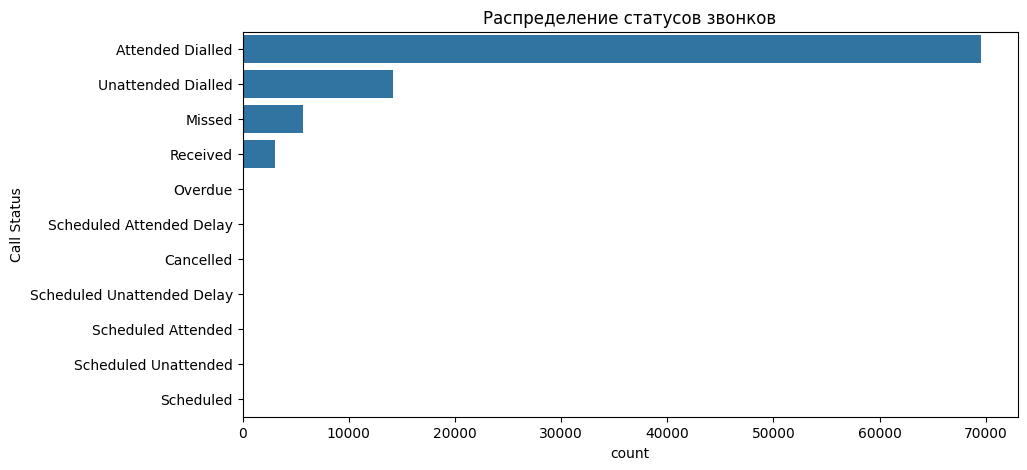

In [45]:
plt.figure(figsize=(10, 5))
sns.countplot(y=calls_df["Call Status"], order=calls_df["Call Status"].value_counts().index)
plt.title("Распределение статусов звонков")
plt.show()

### Замена записей с строках 

In [46]:
calls_df["Call Status"] = calls_df["Call Status"].astype(str)
calls_df["Call Status"] = calls_df["Call Status"].replace("Scheduled Attended Delay", "Scheduled Attended")
calls_df["Call Status"] = calls_df["Call Status"].replace(["Scheduled Unattended Delay", "Scheduled Unattended"], "Scheduled")

calls_df["Call Status"] = calls_df["Call Status"].replace(["Overdue", "Cancelled"], "Overdue + Cancelled")

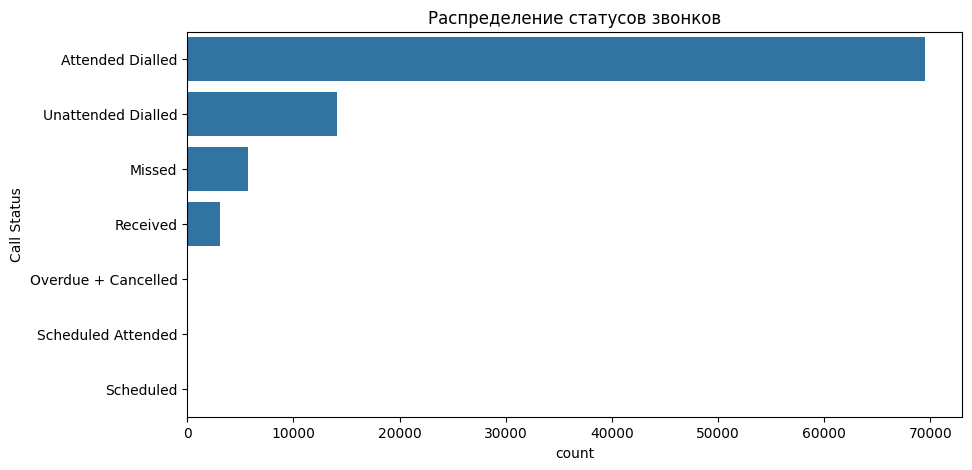

In [47]:
plt.figure(figsize=(10, 5))
sns.countplot(y=calls_df["Call Status"], order=calls_df["Call Status"].value_counts().index)
plt.title("Распределение статусов звонков")
plt.show()

#### Информация из  столбце Outgoing Call Status также есть в столбце Call Status , удаляем его

In [48]:
calls_df = calls_df.drop(columns=["Outgoing Call Status"])

In [49]:
true_count = calls_df["Scheduled in CRM"].eq(True).sum()
false_count = calls_df["Scheduled in CRM"].eq(False).sum()
missing_count = calls_df["Scheduled in CRM"].isna().sum()

print(f"✅ True: {true_count}")
print(f"❌ False: {false_count}")
print(f"🚫 Пропущенные значения (NaN): {missing_count}")

✅ True: 136
❌ False: 83668
🚫 Пропущенные значения (NaN): 8813


In [50]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92617 entries, 0 to 95873
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Id                          92617 non-null  object        
 1   Call Start Time             92617 non-null  datetime64[ns]
 2   Call Owner Name             92617 non-null  object        
 3   CONTACTID                   92617 non-null  object        
 4   Call Type                   92617 non-null  object        
 5   Call Duration (in seconds)  92617 non-null  int64         
 6   Call Status                 92617 non-null  object        
 7   Scheduled in CRM            83804 non-null  float64       
 8   Call Duration (minutes)     92617 non-null  float64       
 9   Call Duration (hours)       92617 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 7.8+ MB


## spend

In [51]:
spend_df= spend

In [52]:
spend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20779 entries, 0 to 20778
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         20779 non-null  datetime64[ns]
 1   Source       20779 non-null  object        
 2   Campaign     14785 non-null  object        
 3   Impressions  20779 non-null  int64         
 4   Spend        20779 non-null  float64       
 5   Clicks       20779 non-null  int64         
 6   AdGroup      13951 non-null  object        
 7   Ad           13951 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.3+ MB


In [53]:
spend_df.sample(5)

,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad
16388,2024-04-24,Facebook Ads,15.04.24LAL_ab__PL,358,2.27,1,LAL1,bloggersvideo16com_pl
14479,2024-04-04,Tiktok Ads,15.03.2024wide_AT,6351,12.98,11,wide,bloggersvideo12com_at
10402,2024-01-27,Telegram posts,NaN,614,3.20,33,NaN,NaN
15413,2024-04-14,Facebook Ads,NaN,0,0.00,0,NaN,NaN
18975,2024-05-27,Telegram posts,NaN,792,0.00,22,NaN,NaN


In [54]:
spend_df.describe()

,Date,Impressions,Spend,Clicks
count,20779,20779.000000,20779.000000,20779.000000
mean,2024-01-14 22:32:40.864334080,2458.203475,7.195892,23.990616
min,2023-07-03 00:00:00,0.000000,0.000000,0.000000
25%,2023-10-13 00:00:00,0.000000,0.000000,0.000000
50%,2024-01-27 00:00:00,63.000000,0.580000,1.000000
75%,2024-04-16 00:00:00,709.000000,5.750000,12.000000
max,2024-06-21 00:00:00,431445.000000,774.000000,2415.000000
std,NaN,11442.528075,26.760080,85.245714


#### Удаление полных дубликатов

In [55]:
spend_df[spend_df.duplicated(subset = spend_df.columns[:])].shape

(917, 8)

In [56]:
# Фильтруем дубликаты по всем столбцам и Spend > 0
duplicates = spend_df[spend_df.duplicated(subset=spend_df.columns[:]) & (spend_df["Spend"] > 0)]

# Считаем сумму Spend среди дубликатов
total_spend_duplicates = duplicates["Spend"].sum()

# Выводим результат
print(f"🔹 Найдено {duplicates.shape[0]} дубликатов с Spend > 0")
print(f"💰 Общая сумма Spend в дубликатах: {total_spend_duplicates:.2f}")


🔹 Найдено 0 дубликатов с Spend > 0
💰 Общая сумма Spend в дубликатах: 0.00


In [57]:
calls_df.drop_duplicates(subset = calls_df.columns[1:], inplace=True)     #inplace=True – удаление дубликатов происходит внутри contacts_df, и изменения сохраняются сразу:
calls_df[calls_df.duplicated(keep=False, subset = calls_df.columns[:])].shape

(0, 10)

#### Удаление не используемых для анализа столбцов 

In [58]:
spend_df = spend_df.drop(columns=["Ad"])

#### Преобразование данных

In [59]:
spend_df.isnull().sum()

Date              0
Source            0
Campaign       5994
Impressions       0
Spend             0
Clicks            0
AdGroup        6828
dtype: int64

#### Для удобности роботы со столбцом заменяем пропуски в Campaign на Unknown

In [60]:
spend_df["Campaign"] = spend_df["Campaign"].fillna("Unknown")

In [61]:
spend_df["Source"] = spend_df["Source"].astype(str)
spend_df["Campaign"] = spend_df["Campaign"].astype(str)

### EDA

#### EDA for "Impressions", "Spend", "Clicks"

 Analyzing column: Impressions
📈 Maximum Value: 431445
📉 Minimum Value: 0
🔄 Mean Value: 2458.20


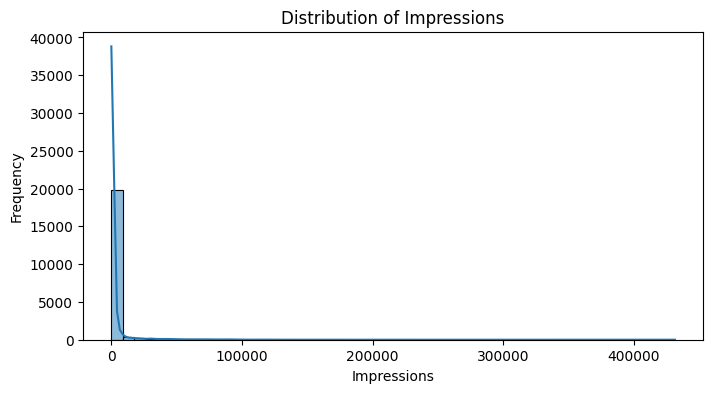

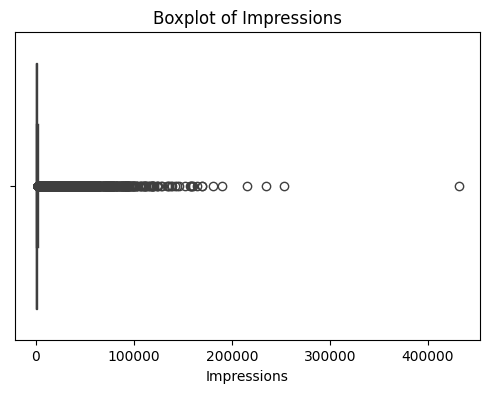

 Analyzing column: Spend
📈 Maximum Value: 774.0
📉 Minimum Value: 0.0
🔄 Mean Value: 7.20


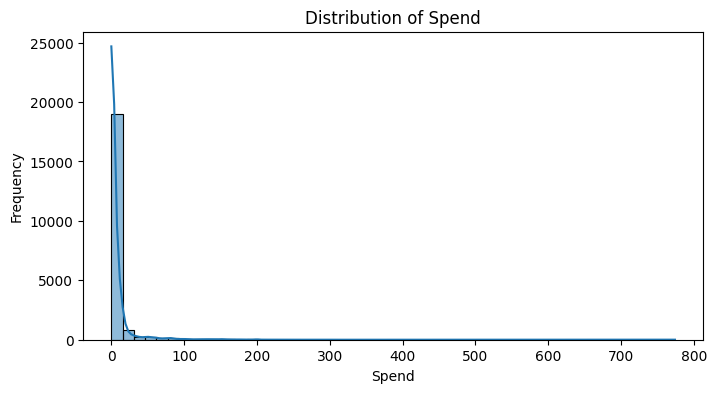

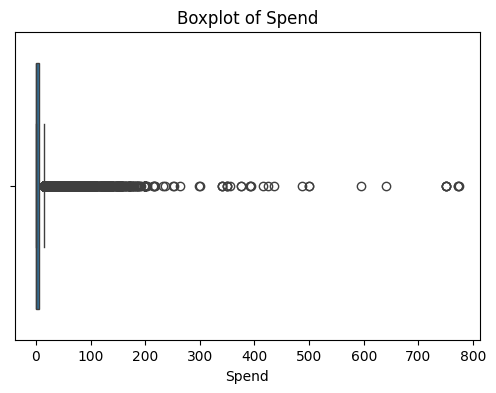

 Analyzing column: Clicks
📈 Maximum Value: 2415
📉 Minimum Value: 0
🔄 Mean Value: 23.99


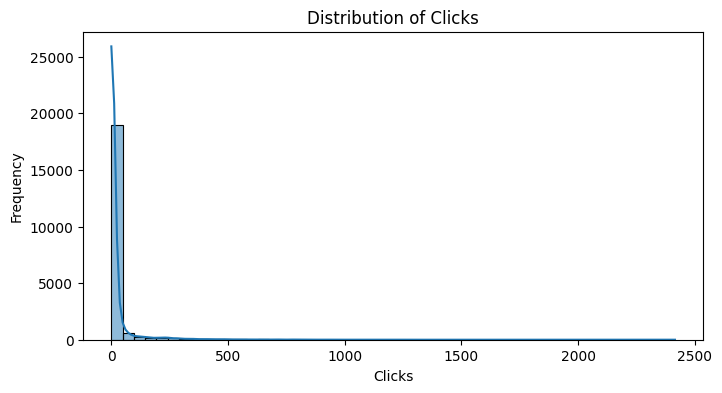

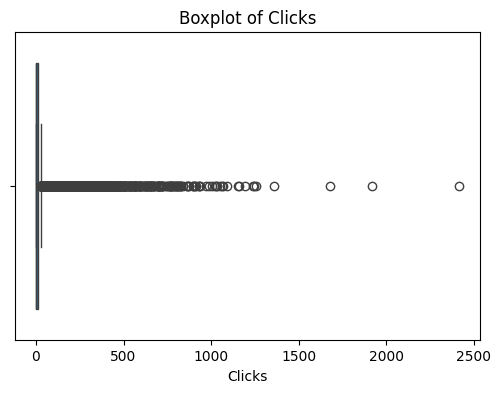

In [62]:
def univariate_analysis(df, column):
    """Function for performing univariate analysis on a numerical column."""
    print(f" Analyzing column: {column}")

    # Calculate summary statistics
    min_value = df[column].min()
    max_value = df[column].max()
    mean_value = df[column].mean()

    print(f"📈 Maximum Value: {max_value}")
    print(f"📉 Minimum Value: {min_value}")
    print(f"🔄 Mean Value: {mean_value:.2f}")


    
    # Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], bins=50, kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")
    plt.xlabel(column)
    plt.show()

# Calling the function for each column
for col in ["Impressions", "Spend", "Clicks"]:
    univariate_analysis(spend_df, col)


#### EDA for category column

 Analyzing column: Source
🔹 Unique values count: 14
📈 Max occurrences: 9732
📉 Min occurrences: 27
🔄 Mean occurrences: 1484.21
📊 Median occurrences: 690.0

 Top 10 most frequent values:
Source
Facebook Ads      9732
Tiktok Ads        3066
Youtube Ads       1926
Google Ads        1428
Telegram posts    1003
Bloggers           787
Webinar            766
SMM                614
Organic            518
CRM                355
Name: count, dtype: int64


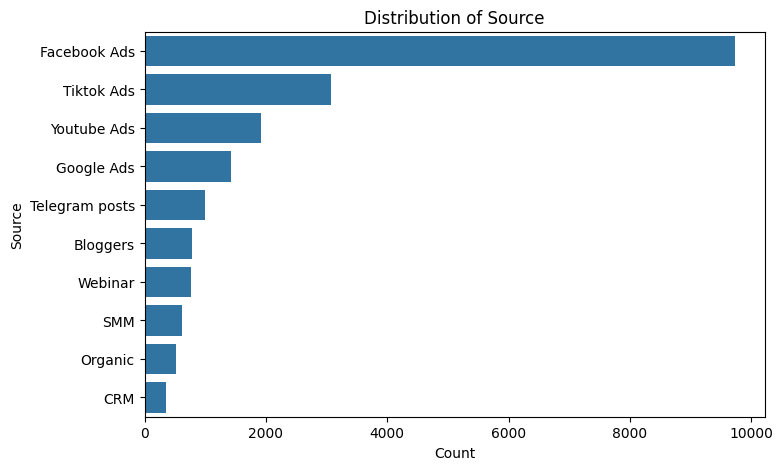

 Analyzing column: Campaign
🔹 Unique values count: 51
📈 Max occurrences: 2073
📉 Min occurrences: 1
🔄 Mean occurrences: 289.90
📊 Median occurrences: 93.0

 Top 10 most frequent values:
Campaign
12.07.2023wide_DE            2073
02.07.23wide_DE              1685
04.07.23recentlymoved_DE     1398
youtube_shorts_DE            1223
07.07.23LAL_DE               1181
03.07.23women                1171
12.09.23interests_Uxui_DE    1143
15.07.23b_DE                  529
24.09.23retargeting_DE        504
performancemax_eng_DE         355
Name: count, dtype: int64


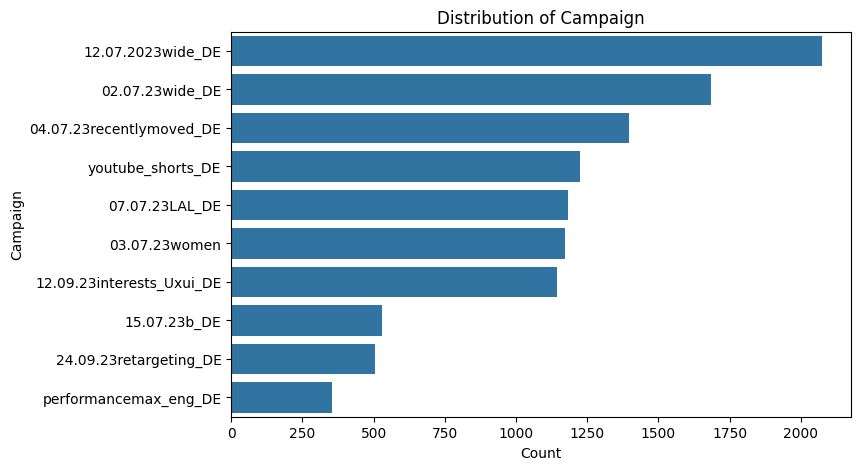

In [63]:
def categorical_analysis(df, column):
    """Function for analyzing categorical columns."""
    print(f" Analyzing column: {column}")

    
    # Count unique values
    unique_count = df[column].nunique()
    print(f"🔹 Unique values count: {unique_count}")

    # Frequency statistics
    value_counts = df[column].value_counts()
    max_count = value_counts.max()  # Most frequent category count
    min_count = value_counts.min()  # Least frequent category count
    mean_count = value_counts.mean()  # Average frequency
    median_count = value_counts.median()  # Median frequency

    print(f"📈 Max occurrences: {max_count}")
    print(f"📉 Min occurrences: {min_count}")
    print(f"🔄 Mean occurrences: {mean_count:.2f}")
    print(f"📊 Median occurrences: {median_count}")

    
    # Top 10 most frequent values
    print("\n Top 10 most frequent values:")
    print(df[column].value_counts().head(10))

    # Bar chart visualization
    plt.figure(figsize=(8, 5))
    sns.countplot(y=df[column], order=df[column].value_counts().index[:10])  # Show top 10 categories
    plt.title(f"Distribution of {column}")
    plt.xlabel("Count")
    plt.ylabel(column)
    plt.show()

# Call function for each categorical column

for col in ["Source"]:
    categorical_analysis(spend_df, col)

categorical_analysis(spend_df[spend_df["Campaign"] != "Unknown"], "Campaign")



## deals

In [64]:
deals_df = deals

In [65]:
deals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21595 entries, 0 to 21594
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   21593 non-null  object 
 1   Deal Owner Name      21564 non-null  object 
 2   Closing Date         14645 non-null  object 
 3   Quality              19340 non-null  object 
 4   Stage                21593 non-null  object 
 5   Lost Reason          16124 non-null  object 
 6   Page                 21593 non-null  object 
 7   Campaign             16067 non-null  object 
 8   SLA                  15533 non-null  object 
 9   Content              14147 non-null  object 
 10  Term                 12454 non-null  object 
 11  Source               21593 non-null  object 
 12  Payment Type         496 non-null    object 
 13  Product              3592 non-null   object 
 14  Education Type       3300 non-null   object 
 15  Created Time         21593 non-null 

In [66]:
deals_df.sample(5)

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
1416,5805028000053381416,Ulysses Adams,NaN,D - Non Target,Call Delayed,NaN,/eng/test,performancemax_eng_DE,NaN,_{region_name}_,...,NaN,NaN,04.06.2024 18:01,NaN,NaN,NaN,NaN,5805028000053399274,NaN,NaN
361,5805028000055821082,Ulysses Adams,NaN,NaN,Registered on Webinar,NaN,/webinar,youtube_shorts_DE,NaN,bloggersvideo1june,...,NaN,NaN,17.06.2024 10:35,NaN,NaN,NaN,NaN,5805028000003571421,NaN,NaN
534,5805028000055351512,Paula Underwood,NaN,NaN,Registered on Webinar,NaN,/webinar,08.04.24wide_webinar_DE,NaN,v7webinar,...,NaN,NaN,14.06.2024 21:14,NaN,NaN,NaN,NaN,5805028000019420803,NaN,NaN
5737,5805028000043264552,Cara Iverson,NaN,NaN,Registered on Webinar,NaN,/webinar,webinar1604,NaN,NaN,...,NaN,NaN,11.04.2024 19:14,NaN,NaN,NaN,NaN,5805028000042108209,NaN,NaN
9063,5805028000034915522,Julia Nelson,28.05.2024,B - Medium,Lost,Changed Decision,/eng/test,NaN,14:46:49,NaN,...,Web Developer,Morning,28.02.2024 19:58,6.0,NaN,1000,5000,5805028000034901446,München,b1


deals_df.describe()

#### Удаление полных дубликатов

In [298]:
deals_df[deals_df.duplicated(subset = deals_df.columns[1:])].shape

(9, 23)

In [67]:
deals_df.drop_duplicates(subset = deals_df.columns[1:], inplace=True)    
deals_df[deals_df.duplicated(keep=False, subset = deals_df.columns[1:])].shape

(0, 23)

### Преобразование данных

In [68]:
deals_df["Created Time"] = pd.to_datetime(deals_df["Created Time"], format="%d.%m.%Y %H:%M", errors='raise')

In [69]:
deals_df["Closing Date"] = pd.to_datetime(deals_df["Closing Date"], format="%d.%m.%Y", errors='coerce')

##### Заменяю в столбцах Course duration и Months of study отсутствующие значение на 0 и преобразую тип данных в int

In [70]:
deals_df["Course duration"] = deals_df["Course duration"].fillna(0).astype(int)

##### Преоброзую SLA в секунды

In [71]:
deals_df["SLA"].apply(type).value_counts()

SLA
<class 'datetime.time'>         13672
<class 'float'>                  6053
<class 'datetime.timedelta'>     1861
Name: count, dtype: int64

In [72]:
def convert_to_seconds(x):
    if pd.isna(x):  # Проверка на NaN
        return np.nan
    elif isinstance(x, datetime.time):  # Если x — объект времени
        return x.hour * 3600 + x.minute * 60 + x.second
    elif isinstance(x, datetime.timedelta):  # Если x — timedelta
        return x.total_seconds()
    else:
        return np.nan  # На случай, если тип неизвестен

# Применение функции к столбцу SLA
deals_df["SLA seconds"] = deals_df["SLA"].apply(convert_to_seconds)


In [73]:
deals_df["SLA seconds"].apply(type).value_counts()

SLA seconds
<class 'float'>    21586
Name: count, dtype: int64

In [74]:
deals_df["SLA minutes"] = (deals_df["SLA seconds"] / 60).round(2)

#####  Столбец SLA больше не нужен, удаляю

In [75]:
deals_df = deals_df.drop(columns=["SLA"])

##### Преобразую столбцы Initial Amount Paid и Offer Total Amount в float

In [76]:
deals_df["Initial Amount Paid"].apply(type).value_counts()

Initial Amount Paid
<class 'float'>    17424
<class 'int'>       4146
<class 'str'>         16
Name: count, dtype: int64

##### Выводим имеющиеся строковые значение и заменяю их на целые значение

In [78]:
print(deals_df.loc[deals_df["Initial Amount Paid"].apply(lambda x: isinstance(x, str)), "Initial Amount Paid"])

94       € 3.500,00
263      € 3.500,00
966      € 3.500,00
1715     € 3.500,00
4164     € 3.500,00
6504     € 3.500,00
9569     € 3.500,00
10841    € 3.500,00
10895    € 3.500,00
12765    € 3.500,00
13072    € 3.500,00
13103    € 3.500,00
13512    € 3.500,00
15290    € 3.500,00
15425    € 3.500,00
17805    € 3.500,00
Name: Initial Amount Paid, dtype: object


In [79]:
deals_df.loc[deals_df["Initial Amount Paid"] == "€ 3.500,00", "Initial Amount Paid"] = 3500

In [80]:
deals_df["Initial Amount Paid"].apply(type).value_counts()

Initial Amount Paid
<class 'float'>    17424
<class 'int'>       4162
Name: count, dtype: int64

##### Анализирую значение в ячейках. Замечено что  значений 1 и 9  всего 3. Такого количества мало для анализа. Заменяю их на среднее значение

In [81]:
# Calculate the mean value excluding NaN
mean_value = deals_df["Initial Amount Paid"].dropna().mean()


deals_df.loc[deals_df["Initial Amount Paid"].isin([1, 9]), "Initial Amount Paid"] = mean_value


##### Преобразую столбец Offer Total Amount в float, также предварительно заменив строковые значения на целые

deals_df["Offer Total Amount"].apply(type).value_counts()

In [82]:
print(deals_df.loc[deals_df["Offer Total Amount"].apply(lambda x: isinstance(x, str)), "Offer Total Amount"])

494      € 2.900,00
1279     € 2.900,00
1484     € 2.900,00
1485     € 2.900,00
1541     € 2.900,00
2148     € 2.900,00
2474     € 2.900,00
3614     € 2.900,00
4152     € 2.900,00
8228     € 2.900,00
15686    € 2.900,00
16246    € 2.900,00
16564    € 2.900,00
16597    € 11398,00
16961    € 2.900,00
17672    € 2.900,00
17827    € 2.900,00
17847    € 2.900,00
18364    € 2.900,00
18642    € 2.900,00
18792    € 2.900,00
Name: Offer Total Amount, dtype: object


In [83]:
deals_df.loc[deals_df["Offer Total Amount"] == "€ 2.900,00", "Offer Total Amount"] = 2900

In [84]:
deals_df.loc[deals_df["Offer Total Amount"] == "€ 11398,00", "Offer Total Amount"] = 11398

In [104]:
deals_df["Offer Total Amount"].apply(type).value_counts()

Offer Total Amount
<class 'float'>    17402
<class 'int'>       4182
Name: count, dtype: int64

### Удаление неиспользуемых столбцов

In [87]:
deals_df = deals_df.drop(columns= "Page")

In [89]:
deals_df = deals_df.drop(columns=  "Term")

In [90]:
deals_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21586 entries, 0 to 21594
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   21584 non-null  object        
 1   Deal Owner Name      21555 non-null  object        
 2   Closing Date         14641 non-null  datetime64[ns]
 3   Quality              19336 non-null  object        
 4   Stage                21584 non-null  object        
 5   Lost Reason          16120 non-null  object        
 6   Campaign             16063 non-null  object        
 7   Content              14141 non-null  object        
 8   Source               21584 non-null  object        
 9   Payment Type         496 non-null    object        
 10  Product              3592 non-null   object        
 11  Education Type       3300 non-null   object        
 12  Created Time         21584 non-null  datetime64[ns]
 13  Course duration      21586 non-null 

### Дозаполняю столбец City

In [91]:
mode_value = deals_df.groupby("Contact Name")["City"].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
deals_df['City'] = deals_df["Contact Name"].map(mode_value)

##### Ищу не правильно заполненые ячейки и заменяю их на название города

In [92]:
city_names = deals_df["City"].dropna()
longest_cities = sorted(city_names, key=lambda x: len(x), reverse=True)[:10]
print(longest_cities)  # Выводим 10 самых длинных строк

['Karl-Liebknecht str. 24, Hildburghausen, Thüringen', 'Karl-Liebknecht str. 24, Hildburghausen, Thüringen', 'Poland , Gdansk , Al. Grunwaldzka 7, ap. 1a', 'Vor Ebersbach 1, 77761 Schiltach', 'Vor Ebersbach 1, 77761 Schiltach', 'Sankt Georgen im Schwarzwald', 'Sankt Georgen im Schwarzwald', 'Sankt Georgen im Schwarzwald', 'Bad Gottleuba-Berggießhübel', 'Eisenbach (Hochschwarzwald)']


In [93]:
city_mapping = {
    'Karl-Liebknecht str. 24, Hildburghausen, Thüringen': ['Hildburghausen', 'Thüringen'],  
    'Poland , Gdansk , Al. Grunwaldzka 7, ap. 1a': 'Gdansk',
    'Vor Ebersbach 1, 77761 Schiltach': 'Schiltach',
    'Sankt Georgen im Schwarzwald': 'Sankt Georgen im Schwarzwald',
    'Bad Gottleuba-Berggießhübel': 'Bad Gottleuba-Berggießhübel',
    'Eisenbach (Hochschwarzwald)': 'Eisenbach'
}

# Заменяем значения в столбце "City"
deals_df["City"] = deals_df["City"].replace(city_mapping)

In [94]:
city_names = deals_df["City"].dropna()
longest_cities = sorted(city_names, key=lambda x: len(x), reverse=True)[:10]
print(longest_cities)

['Sankt Georgen im Schwarzwald', 'Sankt Georgen im Schwarzwald', 'Sankt Georgen im Schwarzwald', 'Bad Gottleuba-Berggießhübel', 'Bad Wildbad im Schwarzwald', 'Höhenkirchen-Siegertsbrunn', 'Höhenkirchen-Siegertsbrunn', 'Bad Wildbad im Schwarzwald', 'Bad Homburg vor der Höhe', 'Bad Homburg vor der Höhe']


#### Обробатываем пропуски 

In [95]:
deals_df.isnull().sum()

Id                         2
Deal Owner Name           31
Closing Date            6945
Quality                 2250
Stage                      2
Lost Reason             5466
Campaign                5523
Content                 7445
Source                     2
Payment Type           21090
Product                17994
Education Type         18286
Created Time               2
Course duration            0
Months of study        20746
Initial Amount Paid    17424
Offer Total Amount     17404
Contact Name              63
City                   18300
Level of Deutsch       20335
SLA seconds             6053
SLA minutes             6053
dtype: int64

In [96]:
deals_df = deals_df.dropna(subset=["Id"])

In [99]:
deals_df.loc[:, ["SLA seconds", "SLA minutes"]] = deals_df.loc[:, ["SLA seconds", "SLA minutes"]].fillna(0)

In [98]:
deals_df.isnull().sum()

Id                         0
Deal Owner Name           29
Closing Date            6943
Quality                 2248
Stage                      0
Lost Reason             5464
Campaign                5521
Content                 7443
Source                     0
Payment Type           21088
Product                17992
Education Type         18285
Created Time               0
Course duration            0
Months of study        20744
Initial Amount Paid    17422
Offer Total Amount     17402
Contact Name              61
City                   18298
Level of Deutsch       20333
SLA seconds             6051
SLA minutes             6051
dtype: int64

#### Дозаполняю отсустствующие значение в Quality, Deal Owner Name

In [100]:
deals_df["Quality"] = deals_df["Quality"].fillna("Other")
deals_df["Deal Owner Name"] = deals_df["Deal Owner Name"].fillna("Unknown")

#### Создаю дополнительный столбец Processing Time, для оценки длительности роботы с клиентом, результат беру по модулю, так как в некоторых колонках Closing Date больше чем Created Time. Предполагаю что они перепутанны местами.

In [101]:
deals_df["Processing Time(days)"] = abs((deals_df["Closing Date"] - deals_df["Created Time"]).dt.days)

##### Если разница в днях ровно 0, заменяю его на 1. Что будет значить что робота с клиентом от первого звонка до заключения контракта ровно одному дню.

In [102]:
deals_df["Processing Time(days)"] = deals_df["Processing Time(days)"].replace(0, 1)

In [82]:
filtered_df = deals_df[deals_df['Closing Date'] > '2024-07-03']
filtered_df

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Campaign,Content,Term,Source,...,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,SLA seconds,SLA minutes,SLA hours,Processing Time(days)
12806,5805028000025477353,Nina Scott,2024-12-11,D - Non Target,Lost,Non target,BloggerShina_DE,NaN,11_01_2024,Bloggers,...,0,NaN,NaN,5805028000016832230,None,NaN,1099.0,18.32,0.31,334.0
13598,5805028000023038521,Victor Barnes,2024-09-25,D - Non Target,Lost,Gutstein refusal,12.07.2023wide_DE,bloggersvideo9com,wide,Tiktok Ads,...,0,1000,11000,5805028000005950094,Neuburg an der Donau,Проходит сейчас повторно B1,748.0,12.47,0.21,273.0


In [90]:
deals_df.loc[deals_df['Closing Date'] > '2024-07-03', 'Closing Date'] = '2024-07-03'


### EDA

#### EDA for category column

 Analyzing column: Deal Owner Name
🔹 Unique values count: 27
📈 Max occurrences: 2961
📉 Min occurrences: 1
🔄 Mean occurrences: 798.33
📊 Median occurrences: 497.0

 Top 10 most frequent values:
Deal Owner Name
Charlie Davis      2961
Julia Nelson       2241
Ulysses Adams      2165
Quincy Vincent     1884
Paula Underwood    1862
Ben Hall           1345
Nina Scott         1282
Victor Barnes      1232
Cara Iverson       1056
Diana Evans        1012
Name: count, dtype: int64


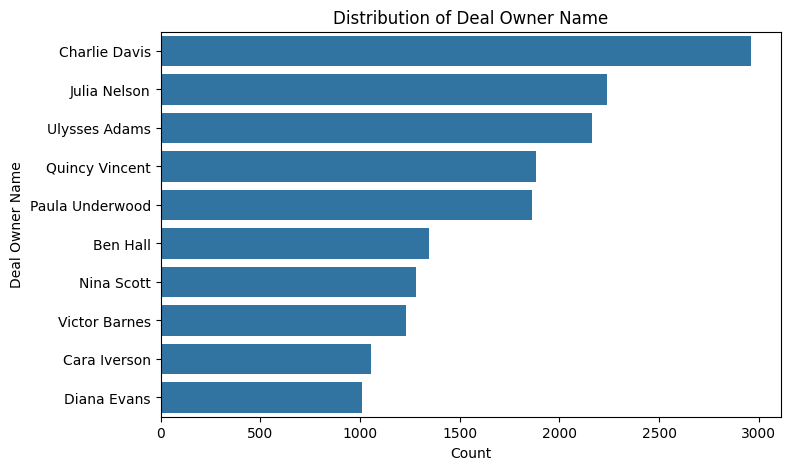

 Analyzing column: Quality
🔹 Unique values count: 7
📈 Max occurrences: 7630
📉 Min occurrences: 3
🔄 Mean occurrences: 3083.43
📊 Median occurrences: 2248.0

 Top 10 most frequent values:
Quality
E - Non Qualified    7630
D - Non Target       6248
C - Low              3459
Other                2248
B - Medium           1564
A - High              432
F                       3
Name: count, dtype: int64


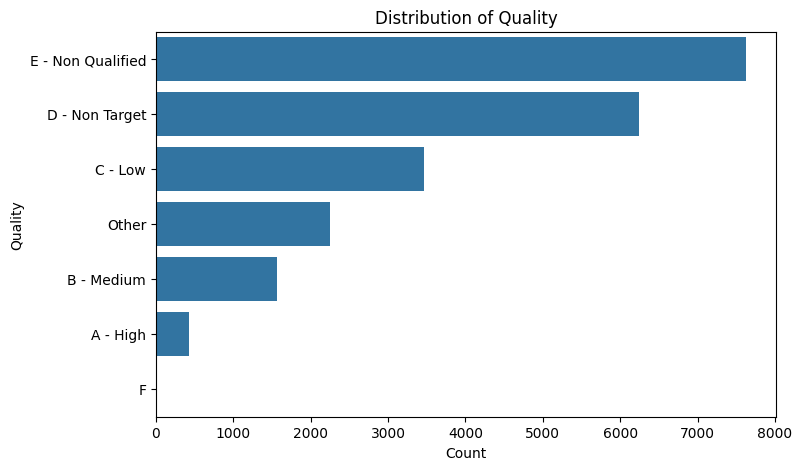

 Analyzing column: Stage
🔹 Unique values count: 13
📈 Max occurrences: 15739
📉 Min occurrences: 1
🔄 Mean occurrences: 1660.31
📊 Median occurrences: 100.0

 Top 10 most frequent values:
Stage
Lost                         15739
Call Delayed                  2248
Registered on Webinar         2068
Payment Done                   858
Waiting For Payment            325
Qualificated                   128
Registered on Offline Day      100
Need to Call - Sales            33
Need To Call                    31
Test Sent                       25
Name: count, dtype: int64


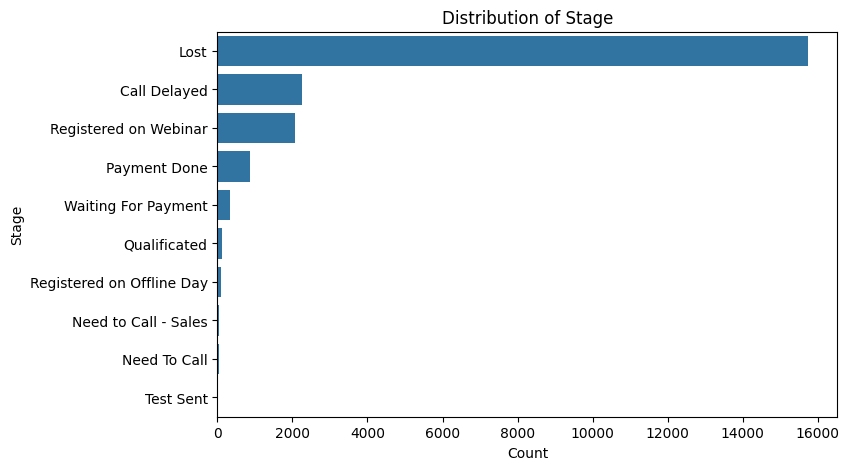

 Analyzing column: Lost Reason
🔹 Unique values count: 21
📈 Max occurrences: 4135
📉 Min occurrences: 1
🔄 Mean occurrences: 767.62
📊 Median occurrences: 176.0

 Top 10 most frequent values:
Lost Reason
Doesn't Answer                 4135
Changed Decision               2146
Duplicate                      1767
Non target                     1761
Stopped Answering              1588
Invalid number                 1481
needs time to think             655
Expensive                       626
Conditions are not suitable     531
Next stream                     288
Name: count, dtype: int64


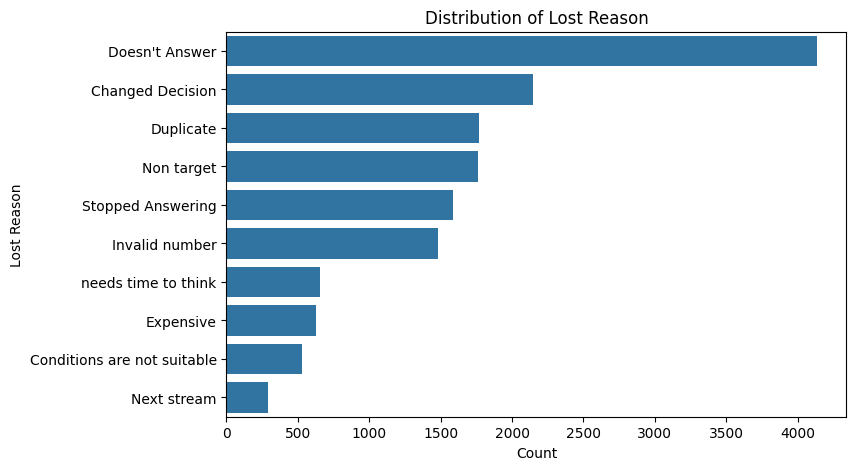

 Analyzing column: Payment Type
🔹 Unique values count: 3
📈 Max occurrences: 350
📉 Min occurrences: 5
🔄 Mean occurrences: 165.33
📊 Median occurrences: 141.0

 Top 10 most frequent values:
Payment Type
Recurring Payments    350
One Payment           141
Reservation             5
Name: count, dtype: int64


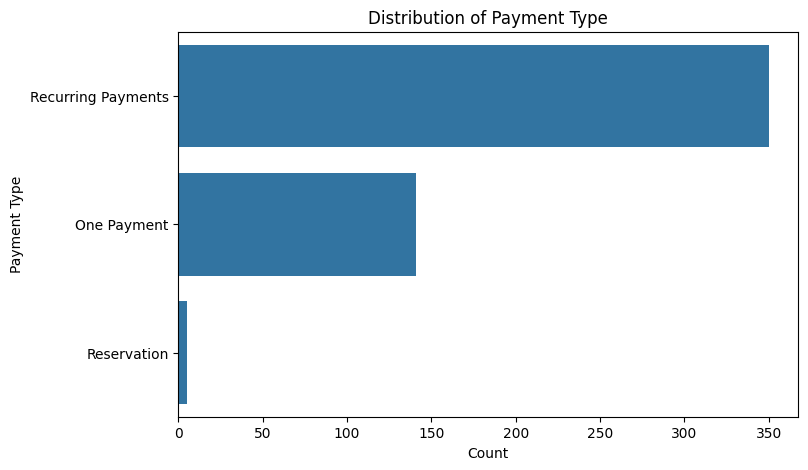

 Analyzing column: Product
🔹 Unique values count: 5
📈 Max occurrences: 1990
📉 Min occurrences: 1
🔄 Mean occurrences: 718.40
📊 Median occurrences: 575.0

 Top 10 most frequent values:
Product
Digital Marketing      1990
UX/UI Design           1022
Web Developer           575
Find yourself in IT       4
Data Analytics            1
Name: count, dtype: int64


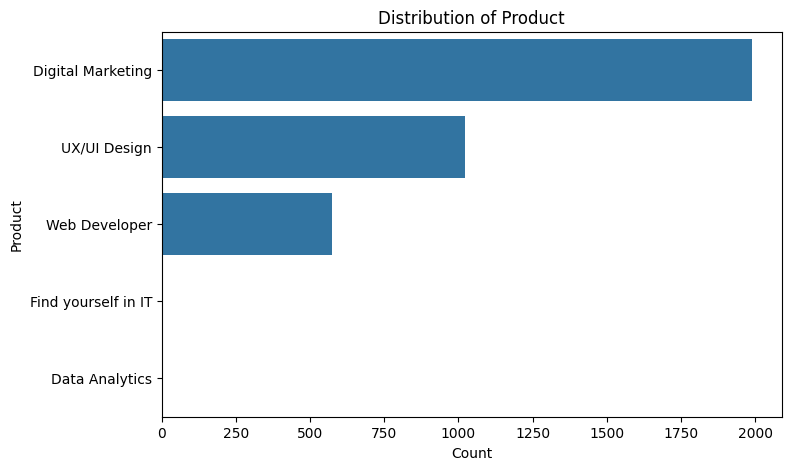

 Analyzing column: Education Type
🔹 Unique values count: 2
📈 Max occurrences: 2895
📉 Min occurrences: 404
🔄 Mean occurrences: 1649.50
📊 Median occurrences: 1649.5

 Top 10 most frequent values:
Education Type
Morning    2895
Evening     404
Name: count, dtype: int64


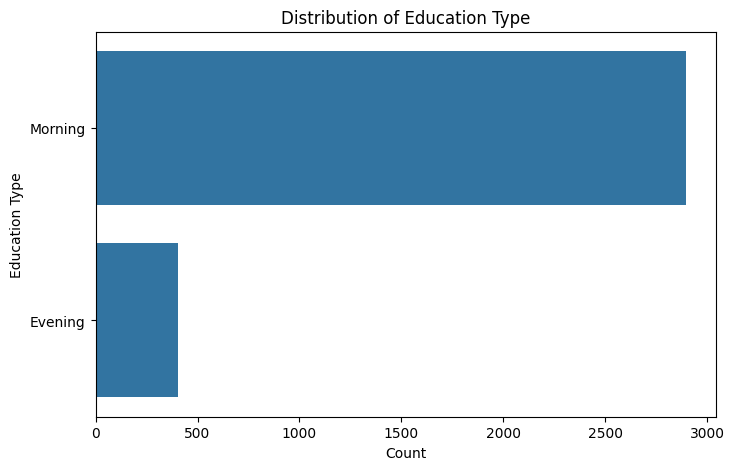

 Analyzing column: Course duration
🔹 Unique values count: 2
📈 Max occurrences: 3012
📉 Min occurrences: 575
🔄 Mean occurrences: 1793.50
📊 Median occurrences: 1793.5

 Top 10 most frequent values:
Course duration
11    3012
6      575
Name: count, dtype: int64


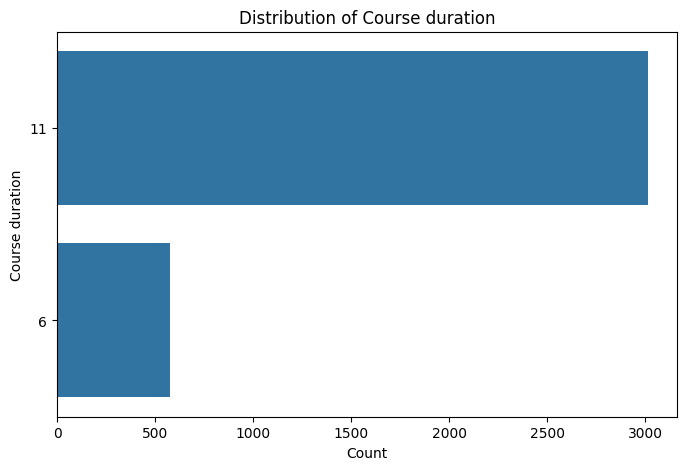

 Analyzing column: Months of study
🔹 Unique values count: 12
📈 Max occurrences: 107
📉 Min occurrences: 1
🔄 Mean occurrences: 70.00
📊 Median occurrences: 73.0

 Top 10 most frequent values:
Months of study
6.0     107
2.0     104
3.0      94
4.0      93
8.0      83
7.0      79
1.0      67
5.0      64
9.0      61
11.0     45
Name: count, dtype: int64


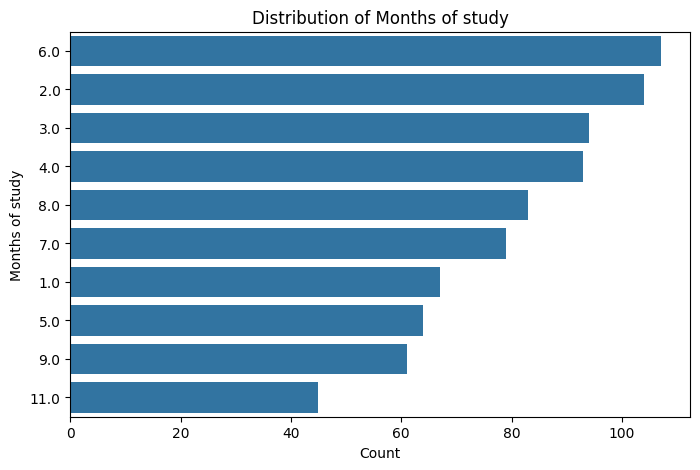

In [105]:
for col in ["Deal Owner Name", "Quality", "Stage", "Lost Reason", "Payment Type", "Product", "Education Type", "Course duration", "Months of study"]:
    if col == "Deal Owner Name":
        categorical_analysis(deals_df[deals_df["Deal Owner Name"] != "Unknown"], col)
    elif col == "Course duration":
        categorical_analysis(deals_df[deals_df[col] != 0], col)
    elif col == "Months of study":
        categorical_analysis(deals_df[deals_df[col].notna()], col)
    else:
        categorical_analysis(deals_df, col)


 Analyzing column: Deal Owner Name
🔹 Unique values count: 27
📈 Max occurrences: 2961
📉 Min occurrences: 1
🔄 Mean occurrences: 798.33
📊 Median occurrences: 497.0

 Top 10 most frequent values:
Deal Owner Name
Charlie Davis      2961
Julia Nelson       2241
Ulysses Adams      2165
Quincy Vincent     1884
Paula Underwood    1862
Ben Hall           1345
Nina Scott         1282
Victor Barnes      1232
Cara Iverson       1056
Diana Evans        1012
Name: count, dtype: int64


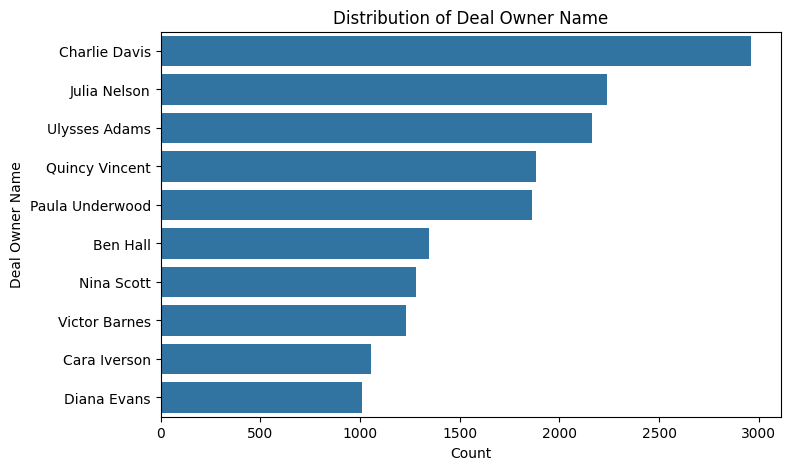

 Analyzing column: Quality
🔹 Unique values count: 7
📈 Max occurrences: 7630
📉 Min occurrences: 3
🔄 Mean occurrences: 3083.43
📊 Median occurrences: 2248.0

 Top 10 most frequent values:
Quality
E - Non Qualified    7630
D - Non Target       6248
C - Low              3459
Other                2248
B - Medium           1564
A - High              432
F                       3
Name: count, dtype: int64


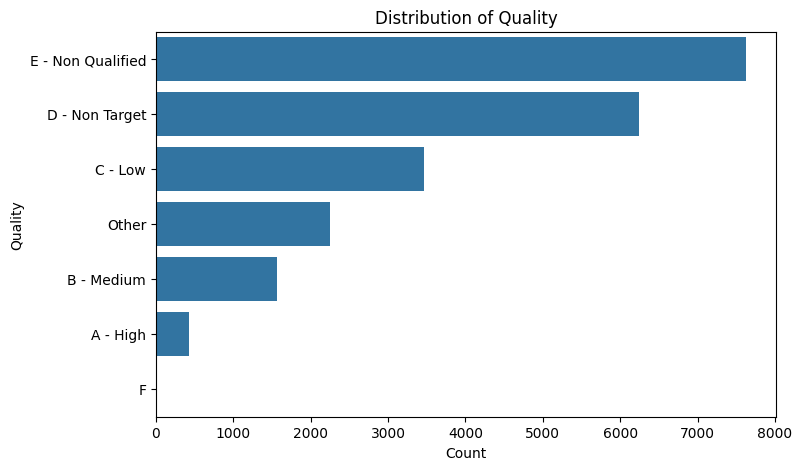

 Analyzing column: Stage
🔹 Unique values count: 13
📈 Max occurrences: 15739
📉 Min occurrences: 1
🔄 Mean occurrences: 1660.31
📊 Median occurrences: 100.0

 Top 10 most frequent values:
Stage
Lost                         15739
Call Delayed                  2248
Registered on Webinar         2068
Payment Done                   858
Waiting For Payment            325
Qualificated                   128
Registered on Offline Day      100
Need to Call - Sales            33
Need To Call                    31
Test Sent                       25
Name: count, dtype: int64


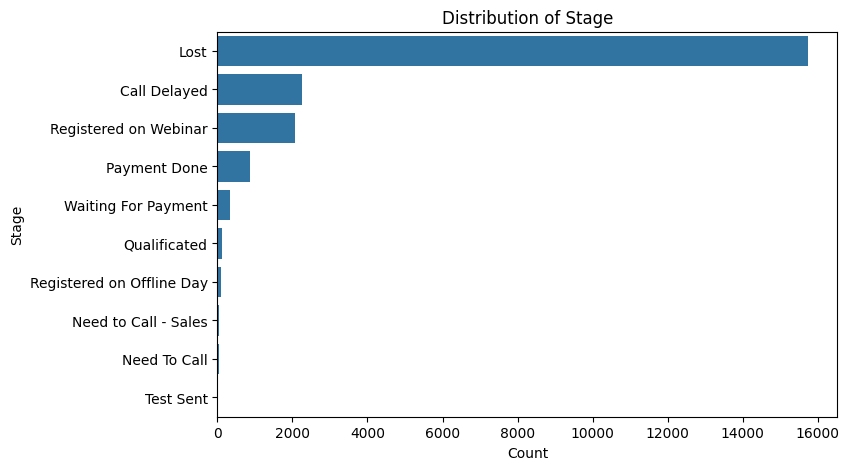

 Analyzing column: Lost Reason
🔹 Unique values count: 21
📈 Max occurrences: 4135
📉 Min occurrences: 1
🔄 Mean occurrences: 767.62
📊 Median occurrences: 176.0

 Top 10 most frequent values:
Lost Reason
Doesn't Answer                 4135
Changed Decision               2146
Duplicate                      1767
Non target                     1761
Stopped Answering              1588
Invalid number                 1481
needs time to think             655
Expensive                       626
Conditions are not suitable     531
Next stream                     288
Name: count, dtype: int64


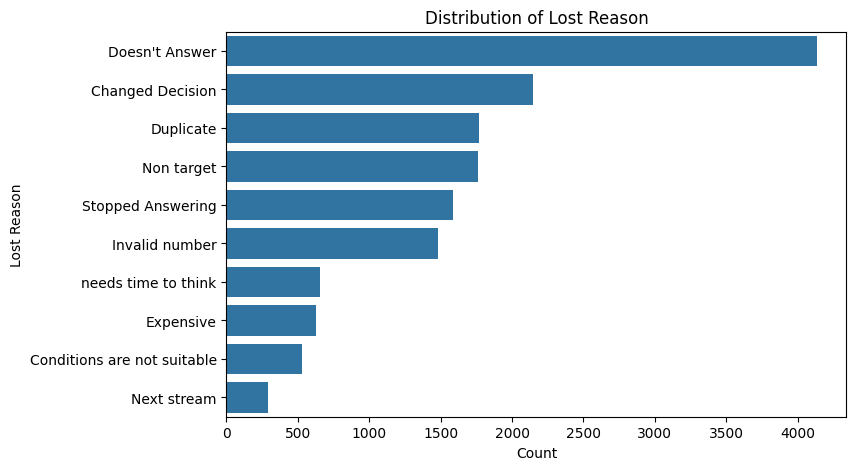

 Analyzing column: Payment Type
🔹 Unique values count: 3
📈 Max occurrences: 350
📉 Min occurrences: 5
🔄 Mean occurrences: 165.33
📊 Median occurrences: 141.0

 Top 10 most frequent values:
Payment Type
Recurring Payments    350
One Payment           141
Reservation             5
Name: count, dtype: int64


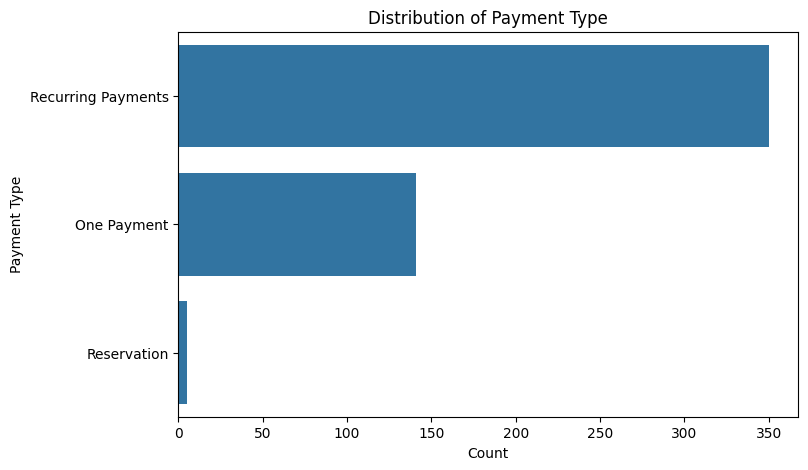

 Analyzing column: Product
🔹 Unique values count: 5
📈 Max occurrences: 1990
📉 Min occurrences: 1
🔄 Mean occurrences: 718.40
📊 Median occurrences: 575.0

 Top 10 most frequent values:
Product
Digital Marketing      1990
UX/UI Design           1022
Web Developer           575
Find yourself in IT       4
Data Analytics            1
Name: count, dtype: int64


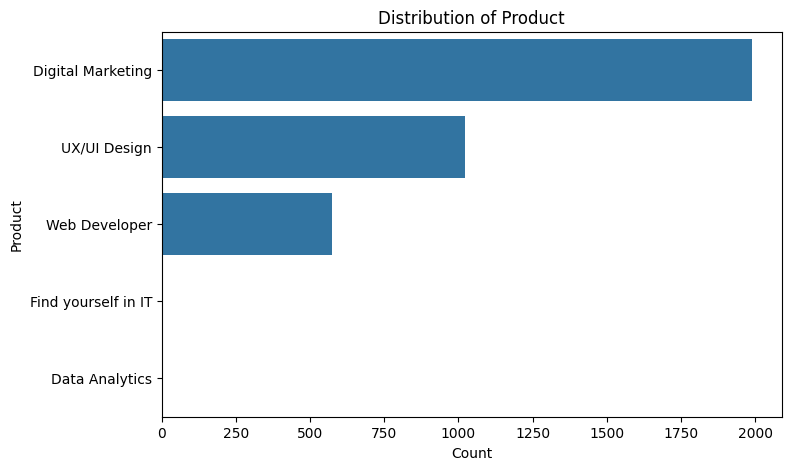

 Analyzing column: Education Type
🔹 Unique values count: 2
📈 Max occurrences: 2895
📉 Min occurrences: 404
🔄 Mean occurrences: 1649.50
📊 Median occurrences: 1649.5

 Top 10 most frequent values:
Education Type
Morning    2895
Evening     404
Name: count, dtype: int64


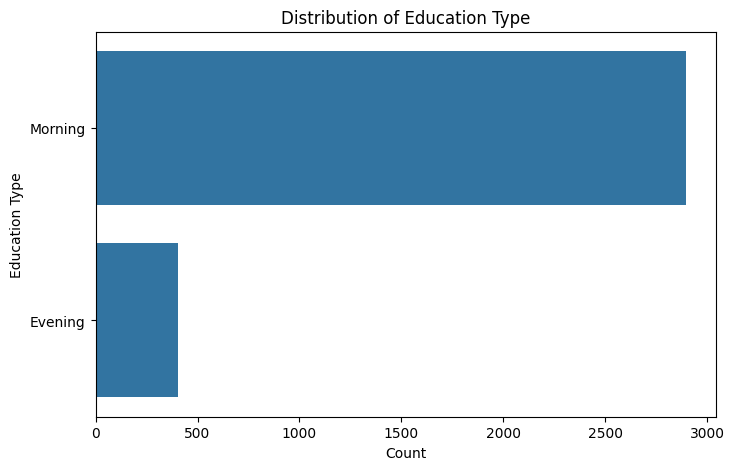

 Analyzing column: Course duration
🔹 Unique values count: 2
📈 Max occurrences: 3012
📉 Min occurrences: 575
🔄 Mean occurrences: 1793.50
📊 Median occurrences: 1793.5

 Top 10 most frequent values:
Course duration
11    3012
6      575
Name: count, dtype: int64


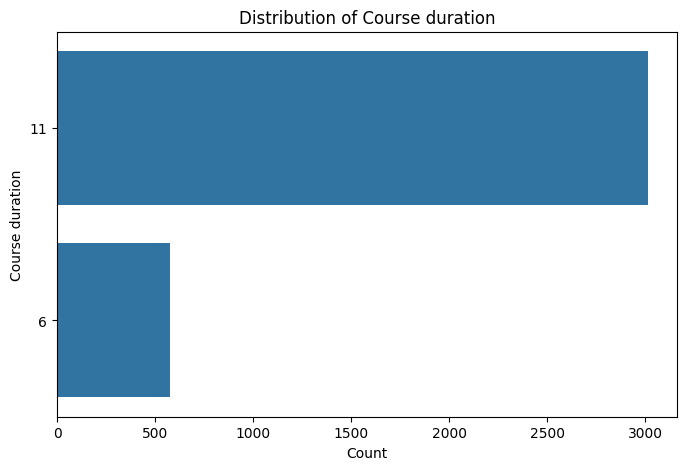

 Analyzing column: Months of study
🔹 Unique values count: 12
📈 Max occurrences: 107
📉 Min occurrences: 1
🔄 Mean occurrences: 70.00
📊 Median occurrences: 73.0

 Top 10 most frequent values:
Months of study
6.0     107
2.0     104
3.0      94
4.0      93
8.0      83
7.0      79
1.0      67
5.0      64
9.0      61
11.0     45
Name: count, dtype: int64


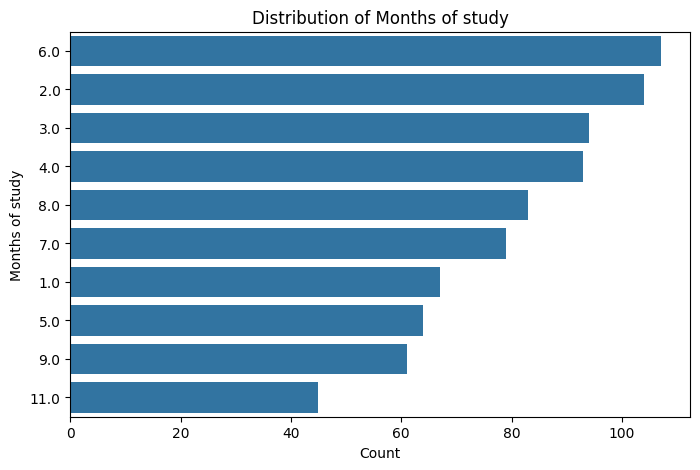

In [106]:
for col in ["Deal Owner Name", "Quality", "Stage", "Lost Reason", "Payment Type", "Product", "Education Type", "Course duration", "Months of study"]:
    if col == "Deal Owner Name":
        categorical_analysis(deals_df[deals_df["Deal Owner Name"] != "Unknown"], col)
    elif col in ["Course duration"]:
        categorical_analysis(deals_df[deals_df[col] != 0], col)
    else:
        categorical_analysis(deals_df, col)





#### EDA for numeric columns

In [380]:
deals_df.describe()

,Closing Date,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,SLA seconds,SLA minutes,SLA hours,Processing Time(days)
count,14641,21584,21584.000000,21584.000000,0.0,0.0,2.158400e+04,21584.000000,21584.000000,14641.000000
mean,2024-01-27 17:42:31.055255808,2024-01-27 02:29:18.805596672,1.694867,0.211824,NaN,NaN,8.335474e+04,1389.245696,23.154115,14.507001
min,2022-10-11 00:00:00,2023-07-03 17:03:00,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000
25%,2023-11-11 00:00:00,2023-11-18 13:33:45,0.000000,0.000000,NaN,NaN,0.000000e+00,0.000000,0.000000,1.000000
50%,2024-02-07 00:00:00,2024-02-05 08:52:30,0.000000,0.000000,NaN,NaN,6.344500e+03,105.745000,1.760000,3.000000
75%,2024-04-17 00:00:00,2024-04-13 19:29:15,0.000000,0.000000,NaN,NaN,4.667050e+04,777.840000,12.960000,11.000000
max,2024-12-11 00:00:00,2024-06-21 15:30:00,11.000000,11.000000,NaN,NaN,2.690846e+07,448474.400000,7474.570000,358.000000
std,NaN,NaN,3.869425,1.199807,NaN,NaN,6.275836e+05,10459.726915,174.328776,31.522818


 Analyzing column: Initial Amount Paid
📈 Maximum Value: 11500
📉 Minimum Value: 0
🔄 Mean Value: 951.68


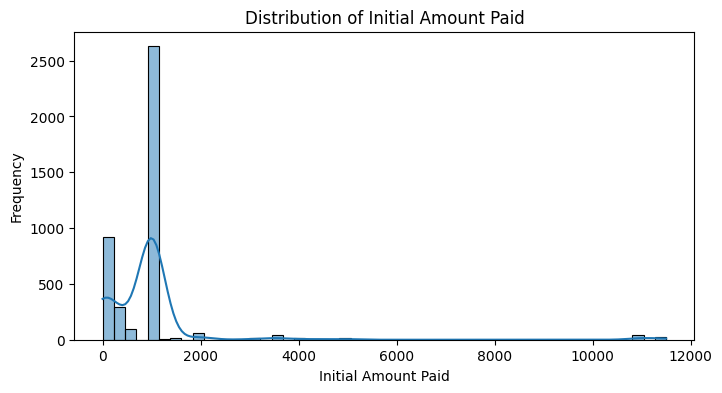

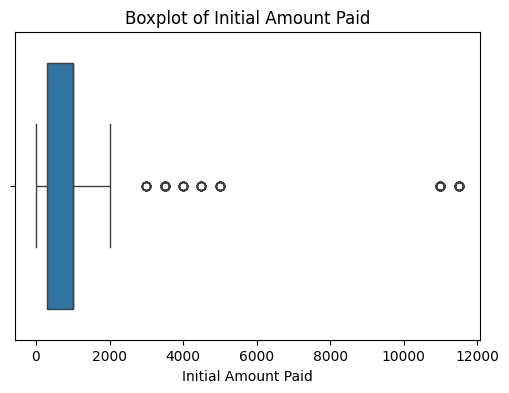

 Analyzing column: Offer Total Amount
📈 Maximum Value: 11500
📉 Minimum Value: 0
🔄 Mean Value: 7133.84


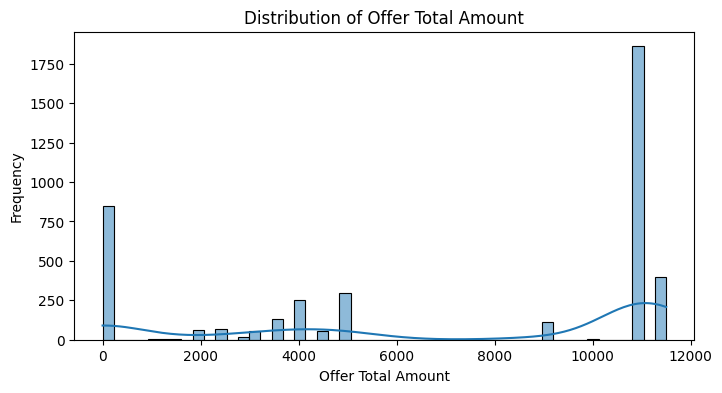

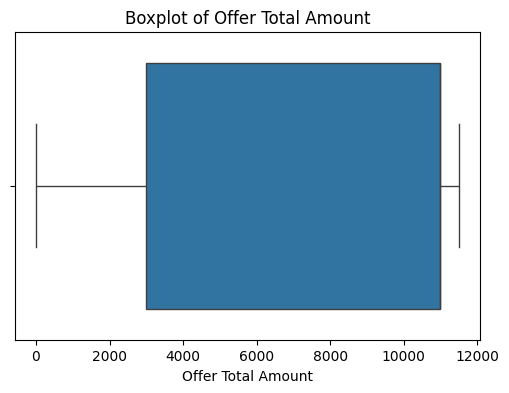

 Analyzing column: SLA minutes
📈 Maximum Value: 448474.4
📉 Minimum Value: 0.05
🔄 Mean Value: 1930.44


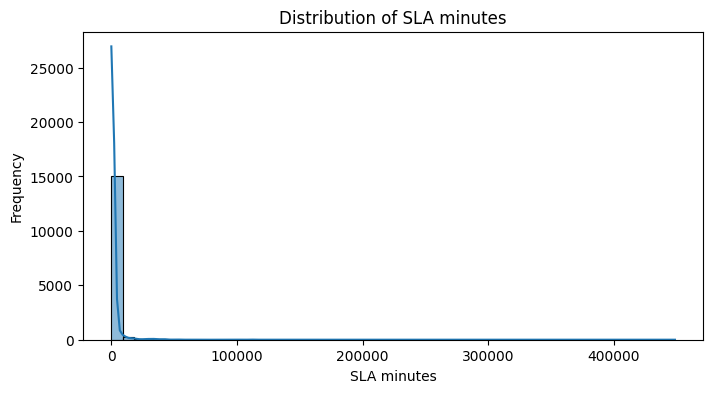

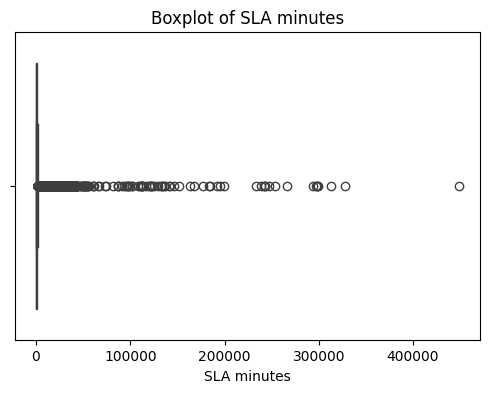

KeyError: 'SLA hours'

In [107]:
for col in ["Initial Amount Paid", "Offer Total Amount", "SLA minutes", "SLA hours", "Processing Time(days)"]:
    if col in ["Initial Amount Paid", "Offer Total Amount"]:
        filtered_df = deals_df[deals_df[col].notna()]  # Исключаем пустые значения
    elif col == "Processing Time(days)":
        filtered_df = deals_df[deals_df[col].notna()]  # Исключаем NaN
    else:
        filtered_df = deals_df[deals_df[col] != 0]  # Исключаем 0

    univariate_analysis(filtered_df, col)




#### EDA for date column

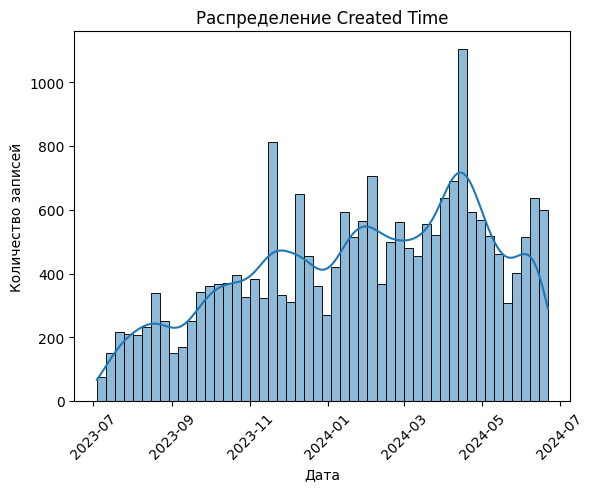

In [108]:
sns.histplot(deals_df["Created Time"], bins=50, kde=True)
plt.title("Распределение Created Time")
plt.xlabel("Дата")
plt.ylabel("Количество записей")
plt.xticks(rotation=45)
plt.show()


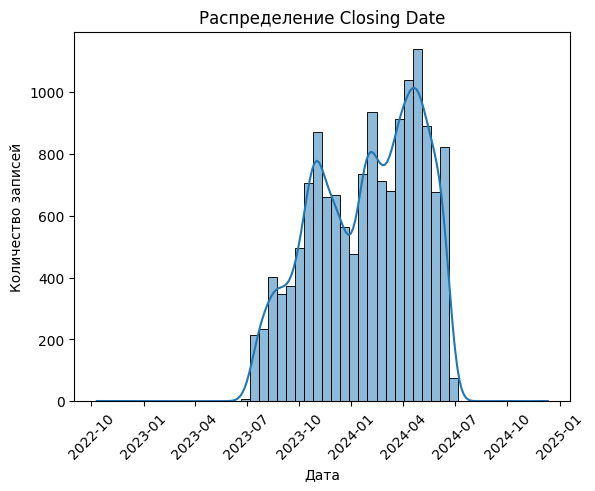

In [109]:
sns.histplot(deals_df["Closing Date"], bins=50, kde=True)
plt.title("Распределение Closing Date")
plt.xlabel("Дата")
plt.ylabel("Количество записей")
plt.xticks(rotation=45)
plt.show()

❌ Датасет выгружен 03.07.24, есть даты после выгрузки

In [393]:
filtered_dates = deals_df[deals_df["Closing Date"] > "2024-07-03"]
filtered_dates.head(5)

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Campaign,Content,Term,Source,...,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,SLA seconds,SLA minutes,SLA hours,Processing Time(days)
12806,5805028000025477353,Nina Scott,2024-12-11,D - Non Target,Lost,Non target,BloggerShina_DE,NaN,11_01_2024,Bloggers,...,0,NaN,NaN,5805028000016832230,None,NaN,1099.0,18.32,0.31,334.0
13598,5805028000023038521,Victor Barnes,2024-09-25,D - Non Target,Lost,Gutstein refusal,12.07.2023wide_DE,bloggersvideo9com,wide,Tiktok Ads,...,0,NaN,NaN,5805028000005950094,Neuburg an der Donau,Проходит сейчас повторно B1,748.0,12.47,0.21,273.0


##### Предполагаю что две даты закрытие которые познее выгрузки была опечатка. Заменяю их на дату создания + середнее значение Processing Time(days)

In [111]:
# Apply condition and replacement
deals_df.loc[deals_df["Closing Date"] > "2024-07-03", "Closing Date"] = deals_df["Created Time"] + pd.Timedelta(days=14)

# Format result as YYYY-MM-DD
deals_df["Created Time"] = deals_df["Closing Date"].dt.strftime("%Y-%m-%d")


In [112]:
filtered_dates2 = deals_df[deals_df["Closing Date"] > "2024-07-03"]
len(filtered_dates2)

0

#### Обработка колонок после EDA

#### 1. Обрабатываю выбросы в Initial Amount Paid

In [113]:
deals_df["Initial Amount Paid"] = deals_df["Initial Amount Paid"].astype(float)
deals_df["Offer Total Amount"] = deals_df["Offer Total Amount"].astype(float)


In [474]:
top_5_rows = deals_df.dropna(subset=["Offer Total Amount"]).nlargest(5, "Offer Total Amount")

top_5_rows.head(5)

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Campaign,Content,Term,Source,Payment Type,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch,SLA seconds,SLA minutes,SLA hours,Processing Time(days)
2416,5805028000050560404,Charlie Davis,2024-06-13,C - Low,Lost,Stopped Answering,12.07.2023wide_DE,bloggersvideo14com,wide,Tiktok Ads,NaN,UX/UI Design,Morning,2024-05-17 22:48:00,11,0,1000.0,11500.0,5805028000050595387,None,NaN,62698.0,1044.97,17.42,26.0
2498,5805028000050317412,Charlie Davis,NaT,C - Low,Waiting For Payment,NaN,07.07.23LAL_DE,bloggersvideo9com,LAL1,Facebook Ads,NaN,Digital Marketing,Morning,2024-05-16 13:32:00,11,0,1000.0,11500.0,5805028000050302385,-,Б1,679.0,11.32,0.19,NaN
3977,5805028000046680479,Charlie Davis,NaT,C - Low,Waiting For Payment,NaN,02.07.23wide_DE,bloggersvideo14com,wide,Facebook Ads,NaN,Digital Marketing,Morning,2024-04-26 14:06:00,11,0,1000.0,11500.0,5805028000046704246,None,NaN,3696.0,61.60,1.03,NaN
4640,5805028000044847370,Charlie Davis,NaT,B - Medium,Lost,Doesn't Answer,yo_DE,NaN,12_04_2024,SMM,NaN,Digital Marketing,Morning,2024-04-18 13:38:00,11,0,1000.0,11500.0,5805028000044859408,None,NaN,18272.0,304.53,5.08,NaN
4645,5805028000044887192,Charlie Davis,NaT,C - Low,Lost,Doesn't Answer,bbo_DE,NaN,15_04_2024,SMM,NaN,UX/UI Design,Morning,2024-04-18 12:55:00,11,0,1000.0,11500.0,5805028000044901370,None,NaN,18990.0,316.50,5.28,NaN


##### В таблице есть значение где ["Offer Total Amount"] < deals_df["Initial Amount Paid"]. Предполагаю что данны перепутаны между собой. Меняю их местами

In [114]:
mask = deals_df["Offer Total Amount"] < deals_df["Initial Amount Paid"]
deals_df.loc[mask, ["Offer Total Amount", "Initial Amount Paid"]] = deals_df.loc[mask, ["Initial Amount Paid", "Offer Total Amount"]].values


### Двухмерный анализ

In [475]:
deals_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21584 entries, 0 to 21592
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Id                     21584 non-null  object        
 1   Deal Owner Name        21584 non-null  object        
 2   Closing Date           14641 non-null  datetime64[ns]
 3   Quality                21584 non-null  object        
 4   Stage                  21584 non-null  object        
 5   Lost Reason            16120 non-null  object        
 6   Campaign               16063 non-null  object        
 7   Content                14141 non-null  object        
 8   Term                   12453 non-null  object        
 9   Source                 21584 non-null  object        
 10  Payment Type           496 non-null    object        
 11  Product                3592 non-null   object        
 12  Education Type         3299 non-null   object        
 13  Create

<Figure size 1300x1700 with 0 Axes>

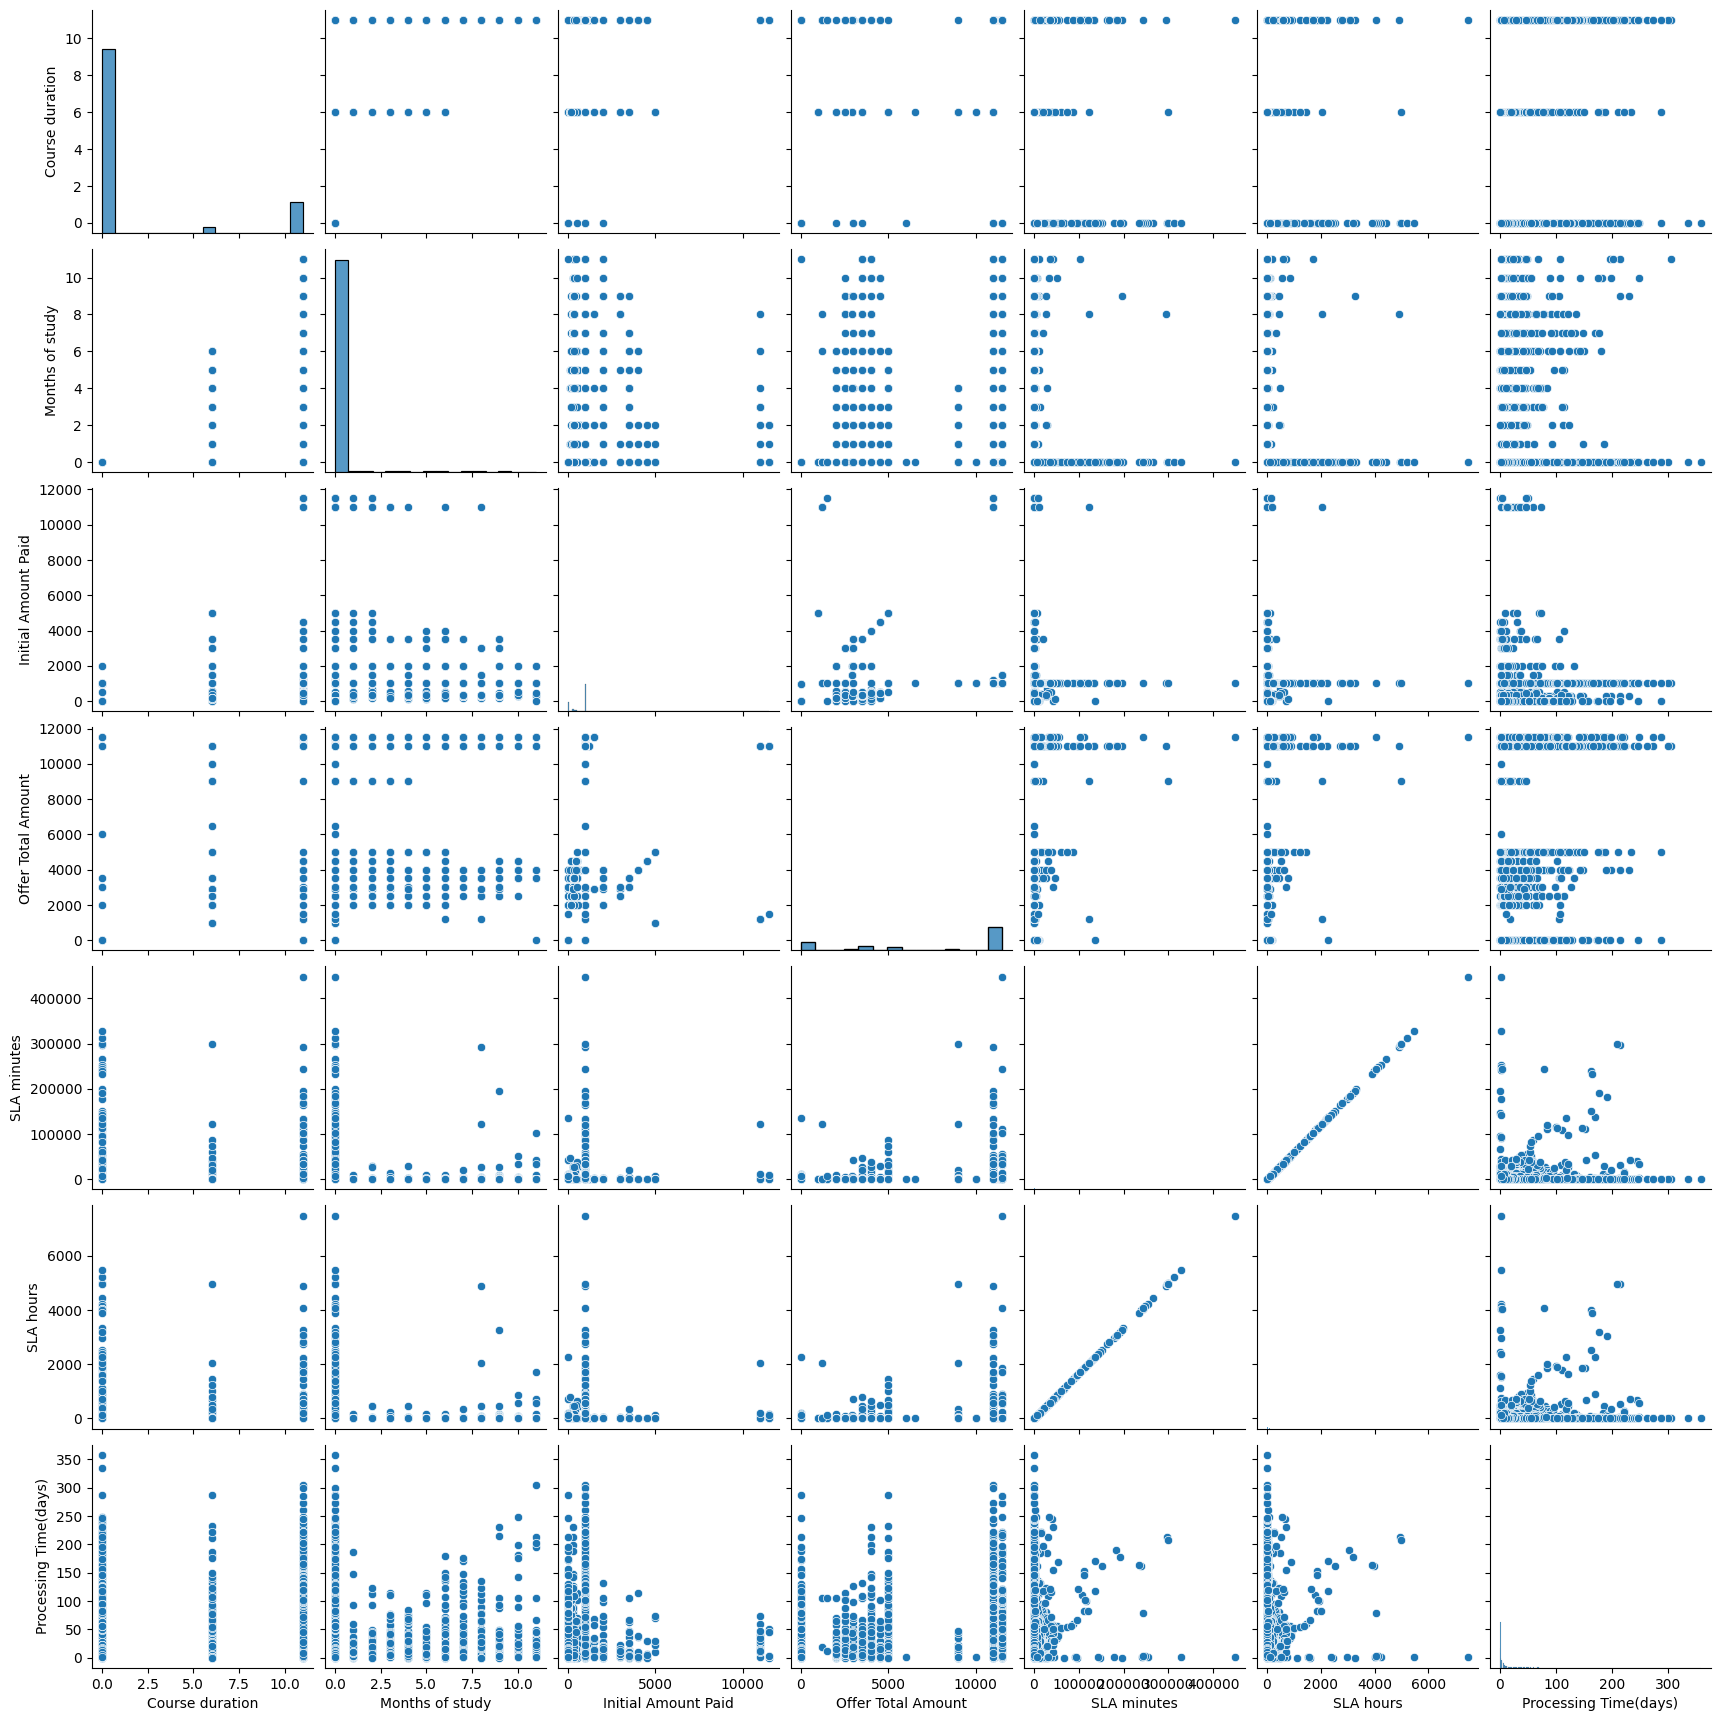

In [477]:
plt.figure(figsize=(13,17))
sns.pairplot(deals_df[["Deal Owner Name", "Quality", "Stage", "Lost Reason", "Payment Type", "Product", "Education Type", "Course duration", "Months of study", "Source", "Initial Amount Paid", "Offer Total Amount", "SLA minutes", "SLA hours", "Processing Time(days)" ]])
plt.show()

### Сохраняю данные и продолжаю анализ в Power Bi

deals_df.to_parquet("deals_data.parquet", index=False)

In [115]:
calls_df.to_parquet("calls_data.parquet", index=False)

In [116]:
contacts_df.to_parquet("contacts_data.parquet", index=False)

In [117]:
spend_df.to_parquet("spend_data.parquet", index=False)

In [118]:
deals_df.to_csv("deals_data.csv", index=False, encoding="utf-8")


In [119]:

deals_df.to_excel("deals_data.xlsx", index=False, engine="openpyxl")


In [120]:

calls_df.to_excel("calls_data.xlsx", index=False, engine="openpyxl")


In [121]:

contacts_df.to_excel("contacts_data.xlsx", index=False, engine="openpyxl")


In [122]:

spend_df.to_excel("spend_data.xlsx", index=False, engine="openpyxl")
